In [92]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, make_scorer, confusion_matrix, f1_score, recall_score, precision_score, log_loss
from sklearn.feature_selection import RFE
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
import scipy.stats as stats
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")
import jenkspy
from sklearn.pipeline import Pipeline
import plotly.express as px
import pickle
from sklearn.manifold import TSNE
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [93]:
# Loading the dataset
df = pd.read_csv('datas.csv', delimiter = ';')

In [94]:
# Loading the first 5 samples of the dataset
df.head(5)

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [95]:
# Getting information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [96]:
# Renaming the columns in the dataset
df.columns = ['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target']

In [97]:
# Checking for duplicate values
print(f'There are {df.duplicated().sum()} duplicated values in the datset')

There are 0 duplicated values in the datset


In [98]:
# Creating a function to generate statistical summary and general information about the dataset
def summary_table(df):
    # Print the shape of the DataFrame (rows, columns)
    print(f'data shape: {df.shape}')
    
    # Create a DataFrame to hold the summary information
    summ = pd.DataFrame(df.dtypes, columns=['data type'])  # Column for data types
    
    # Add a column for the number of missing values in each column
    summ['#missing'] = df.isnull().sum().values
    
    # Add a column for the percentage of missing values in each column
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    
    # Add a column for the number of unique values in each column
    summ['#unique'] = df.nunique().values
    
    # Get descriptive statistics for all columns and transpose the DataFrame
    desc = pd.DataFrame(df.describe(include='all').transpose())
    
    # Add columns from the descriptive statistics to the summary DataFrame
    summ['count'] = desc['count'].values
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['mean'] = desc['mean'].values
    summ['std'] = desc['std'].values
    summ['median'] = desc['50%'].values
    
    
    # Return the summary DataFrame
    return summ


In [99]:
# Getting a summary of the dataset using the function created earlier
summary_table(df)

data shape: (4424, 37)


data type  #missing  %missing  \
Marital status                                     int64         0       0.0   
Application mode                                   int64         0       0.0   
Application order                                  int64         0       0.0   
Course                                             int64         0       0.0   
Daytime/evening attendance                         int64         0       0.0   
Previous qualification                             int64         0       0.0   
Previous qualification (grade)                   float64         0       0.0   
Nationality                                        int64         0       0.0   
Mother's qualification                             int64         0       0.0   
Father's qualification                             int64         0       0.0   
Mother's occupation                                int64         0       0.0   
Father's occupation                                int64         0       0.0   
Admission grade                                  float64         0       0.0   
Displaced                                          int64         0       0.0   
Educational special needs                          int64         0       0.0   
Debtor                                             int64         0       0.0   
Tuition fees up to date                            int64         0       0.0   
Gender                                             int64         0       0.0   
Scholarship holder                                 int64         0       0.0   
Age at enrollment                                  int64         0       0.0   
International                                      int64         0       0.0   
Curricular units 1st sem (credited)                int64         0       0.0   
Curricular units 1st sem (enrolled)                int64         0       0.0   
Curricular units 1st sem (evaluations)             int64         0       0.0   
Curricular units 1st sem (approved)                int64         0       0.0   
Curricular units 1st sem (grade)                 float64         0       0.0   
Curricular units 1st sem (without evaluations)     int64         0       0.0   
Curricular units 2nd sem (credited)                int64         0       0.0   
Curricular units 2nd sem (enrolled)                int64         0       0.0   
Curricular units 2nd sem (evaluations)             int64         0       0.0   
Curricular units 2nd sem (approved)                int64         0       0.0   
Curricular units 2nd sem (grade)                 float64         0       0.0   
Curricular units 2nd sem (without evaluations)     int64         0       0.0   
Unemployment rate                                float64         0       0.0   
Inflation rate                                   float64         0       0.0   
GDP                                              float64         0       0.0   
Target                                            object         0       0.0   

                                                #unique   count   min  \
Marital status                                        6  4424.0   1.0   
Application mode                                     18  4424.0   1.0   
Application order                                     8  4424.0   0.0   
Course                                               17  4424.0  33.0   
Daytime/evening attendance                            2  4424.0   0.0   
Previous qualification                               17  4424.0   1.0   
Previous qualification (grade)                      101  4424.0  95.0   
Nationality                                          21  4424.0   1.0   
Mother's qualification                               29  4424.0   1.0   
Father's qualification                               34  4424.0   1.0   
Mother's occupation                                  32  4424.0   0.0   
Father's occupation                                  46  4424.0   0.0   
Admission grade                                     620  

### Summary:

- Marital status: Most values seem to be concentrated on a specific category, as 75% of the data have a value of 1, while the max is 6.
- Application mode: It has a high standard deviation (17.48), with a mean of 18.67, indicating a wide range of modes with some large outliers (max = 57).
- Application order: Most applicants appear to be in the 1st or 2nd order, as the median (50%) is 1 and the third quartile is 2. The maximum value of 9 indicates that some applicants applied in later orders.
- Daytime/evening attendance: Most students attended during the day (median and 75th percentile = 1, with a max of 1). 
- Course: The values range widely from 33 to 9991, with an average of around 8856. The high standard deviation (2063.57) suggests that different courses have widely varying codes or identifiers.
- Admission grade: The average admission grade is around 127 with a standard deviation of 14.48. The grades span from 95 to 190.
- Age at enrollment: The median age is 20 years, with a fairly large range of 17 to 70 years. 
- Curricular units (1st and 2nd semesters): This feature includes the number of credited, enrolled, evaluated, and approved curricular units, as well as the grades. The data shows a range of involvement in curricular units across students, with most students having a median grade of 12-13 and enrolling in 6-7 units per semester.
- Unemployment rate: The unemployment rate ranges from 7.6 to 16.2, with a median of 11.1%.
- Inflation rate: The inflation rate ranges from -0.8 to 3.7, with a median of 1.4%.
- GDP: The GDP values range from -4.06 to 3.51, with a median of 0.32, indicating some fluctuation in economic growth. 


From the above chart of descriptive statistics, it can be deduced that the following columns are categorical as they appears to have specific or discrete values.
- 'Marital status'
- 'Application order'
- 'Daytime/evening attendance'
- 'Displaced'
- 'Educational special needs'
- 'Debtor',
- 'Tuition fees up to date' 
- 'Gender'
- 'Scholarship holder'
- 'International'

# Data Cleaning

In [100]:
# Initialize an empty list to store column names that are converted to categorical
cat_cols = []

# Define a function that checks the number of unique values in a given column of a DataFrame
def check_unique_values(df, column):
    # Get the count of unique values in the specified column
    unique_count = df[column].nunique()
    
    # If the number of unique values is less than or equal to 6
    if unique_count <= 6:
        # Print a message indicating that the column has 6 or fewer unique values
        print(f"Column '{column}' has {unique_count} unique values, which is <= 6.")
        
        # Convert the column to the 'category' dtype to save memory
        df[column] = df[column].astype('category')
        
        # Append the column name to the 'cat_cols' list for reference
        cat_cols.append(column)
    else:
        # Print a message indicating that the column has more than 6 unique values
        print(f"Column '{column}' has {unique_count} unique values, which is > 6.")


In [101]:
# Create a copy of the original DataFrame to avoid modifying the original data
sub_df = df.copy()
# The copied data wil be used in data visualization and analysis
# Iterate through all columns in the DataFrame
for cols in df.columns:
    # Apply the check_unique_values function to each column
    check_unique_values(sub_df, cols)


Column 'Marital status' has 6 unique values, which is <= 6.
Column 'Application mode' has 18 unique values, which is > 6.
Column 'Application order' has 8 unique values, which is > 6.
Column 'Course' has 17 unique values, which is > 6.
Column 'Daytime/evening attendance' has 2 unique values, which is <= 6.
Column 'Previous qualification' has 17 unique values, which is > 6.
Column 'Previous qualification (grade)' has 101 unique values, which is > 6.
Column 'Nationality' has 21 unique values, which is > 6.
Column 'Mother's qualification' has 29 unique values, which is > 6.
Column 'Father's qualification' has 34 unique values, which is > 6.
Column 'Mother's occupation' has 32 unique values, which is > 6.
Column 'Father's occupation' has 46 unique values, which is > 6.
Column 'Admission grade' has 620 unique values, which is > 6.
Column 'Displaced' has 2 unique values, which is <= 6.
Column 'Educational special needs' has 2 unique values, which is <= 6.
Column 'Debtor' has 2 unique values,

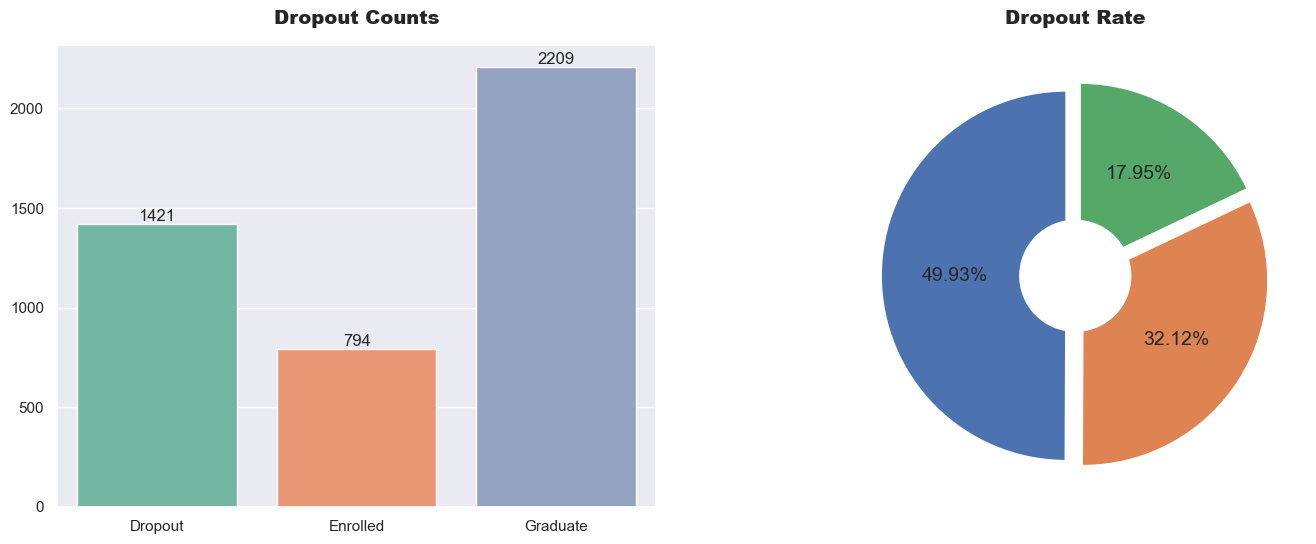

In [102]:
# Set Seaborn aesthetic parameters for all the following plots
sns.set()

# Create a new figure for the plots with a specified size (17x6 inches)
plt.figure(figsize=(17, 6))

# First subplot: Bar plot of churn (or dropout) counts
plt.subplot(1, 2, 1)  # Set up a 1x2 grid of subplots, this is the first plot
# Count the occurrences of each unique value in the 'Target' column
dropout_rate = sub_df['Target'].value_counts()

# Create a color palette based on the number of unique dropout categories
colors = sns.color_palette('Set2', len(dropout_rate))

# Create a bar plot with 'Target' categories on the x-axis and their counts on the y-axis
ax = sns.barplot(x=dropout_rate.index, y=dropout_rate.values, palette=colors)

# Add a title to the bar plot with custom font weight, size, and padding
plt.title("Dropout Counts", fontweight="black", size=14, pad=15)

# Loop through each container in the bar plot to add labels showing the height (value) of each bar
for container in ax.containers:
    ax.bar_label(container)

# Second subplot: Exploded pie chart showing dropout percentage
plt.subplot(1, 2, 2)  # Move to the second plot in the 1x2 grid

# Specify the explosion (separation) for each slice in the pie chart (0.05 for slight separation)
explode = [0.05] * len(dropout_rate)

# Create a pie chart of the dropout rate with percentage labels, larger text, and starting angle at 90 degrees
plt.pie(dropout_rate, autopct="%.2f%%", textprops={
        "size": 14}, startangle=90, explode=explode)

# Create a white circle in the middle to give the pie chart a donut-like appearance
center_circle = plt.Circle((0, 0), 0.3, fc='white')

# Get the current figure and add the white circle to the pie chart
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add a title to the pie chart with custom font weight, size, and padding
plt.title("Dropout Rate", fontweight="black", size=14, pad=15)

# Display the final set of plots
plt.show()

### Insight: 
- The largest group is "Graduate," followed by "Dropout," with "Enrolled" having the lowest count.

- Nearly half of the population has graduated (49.93%), while 32.12% are still enrolled. A smaller portion, 17.95%, has dropped out.:
- A significant portion (about 50%) has completed their studies.
- The dropout rate is lower than the enrolled rate, indicating that most students either complete or are still in the process of completing their education.

<Figure size 3000x3000 with 0 Axes>

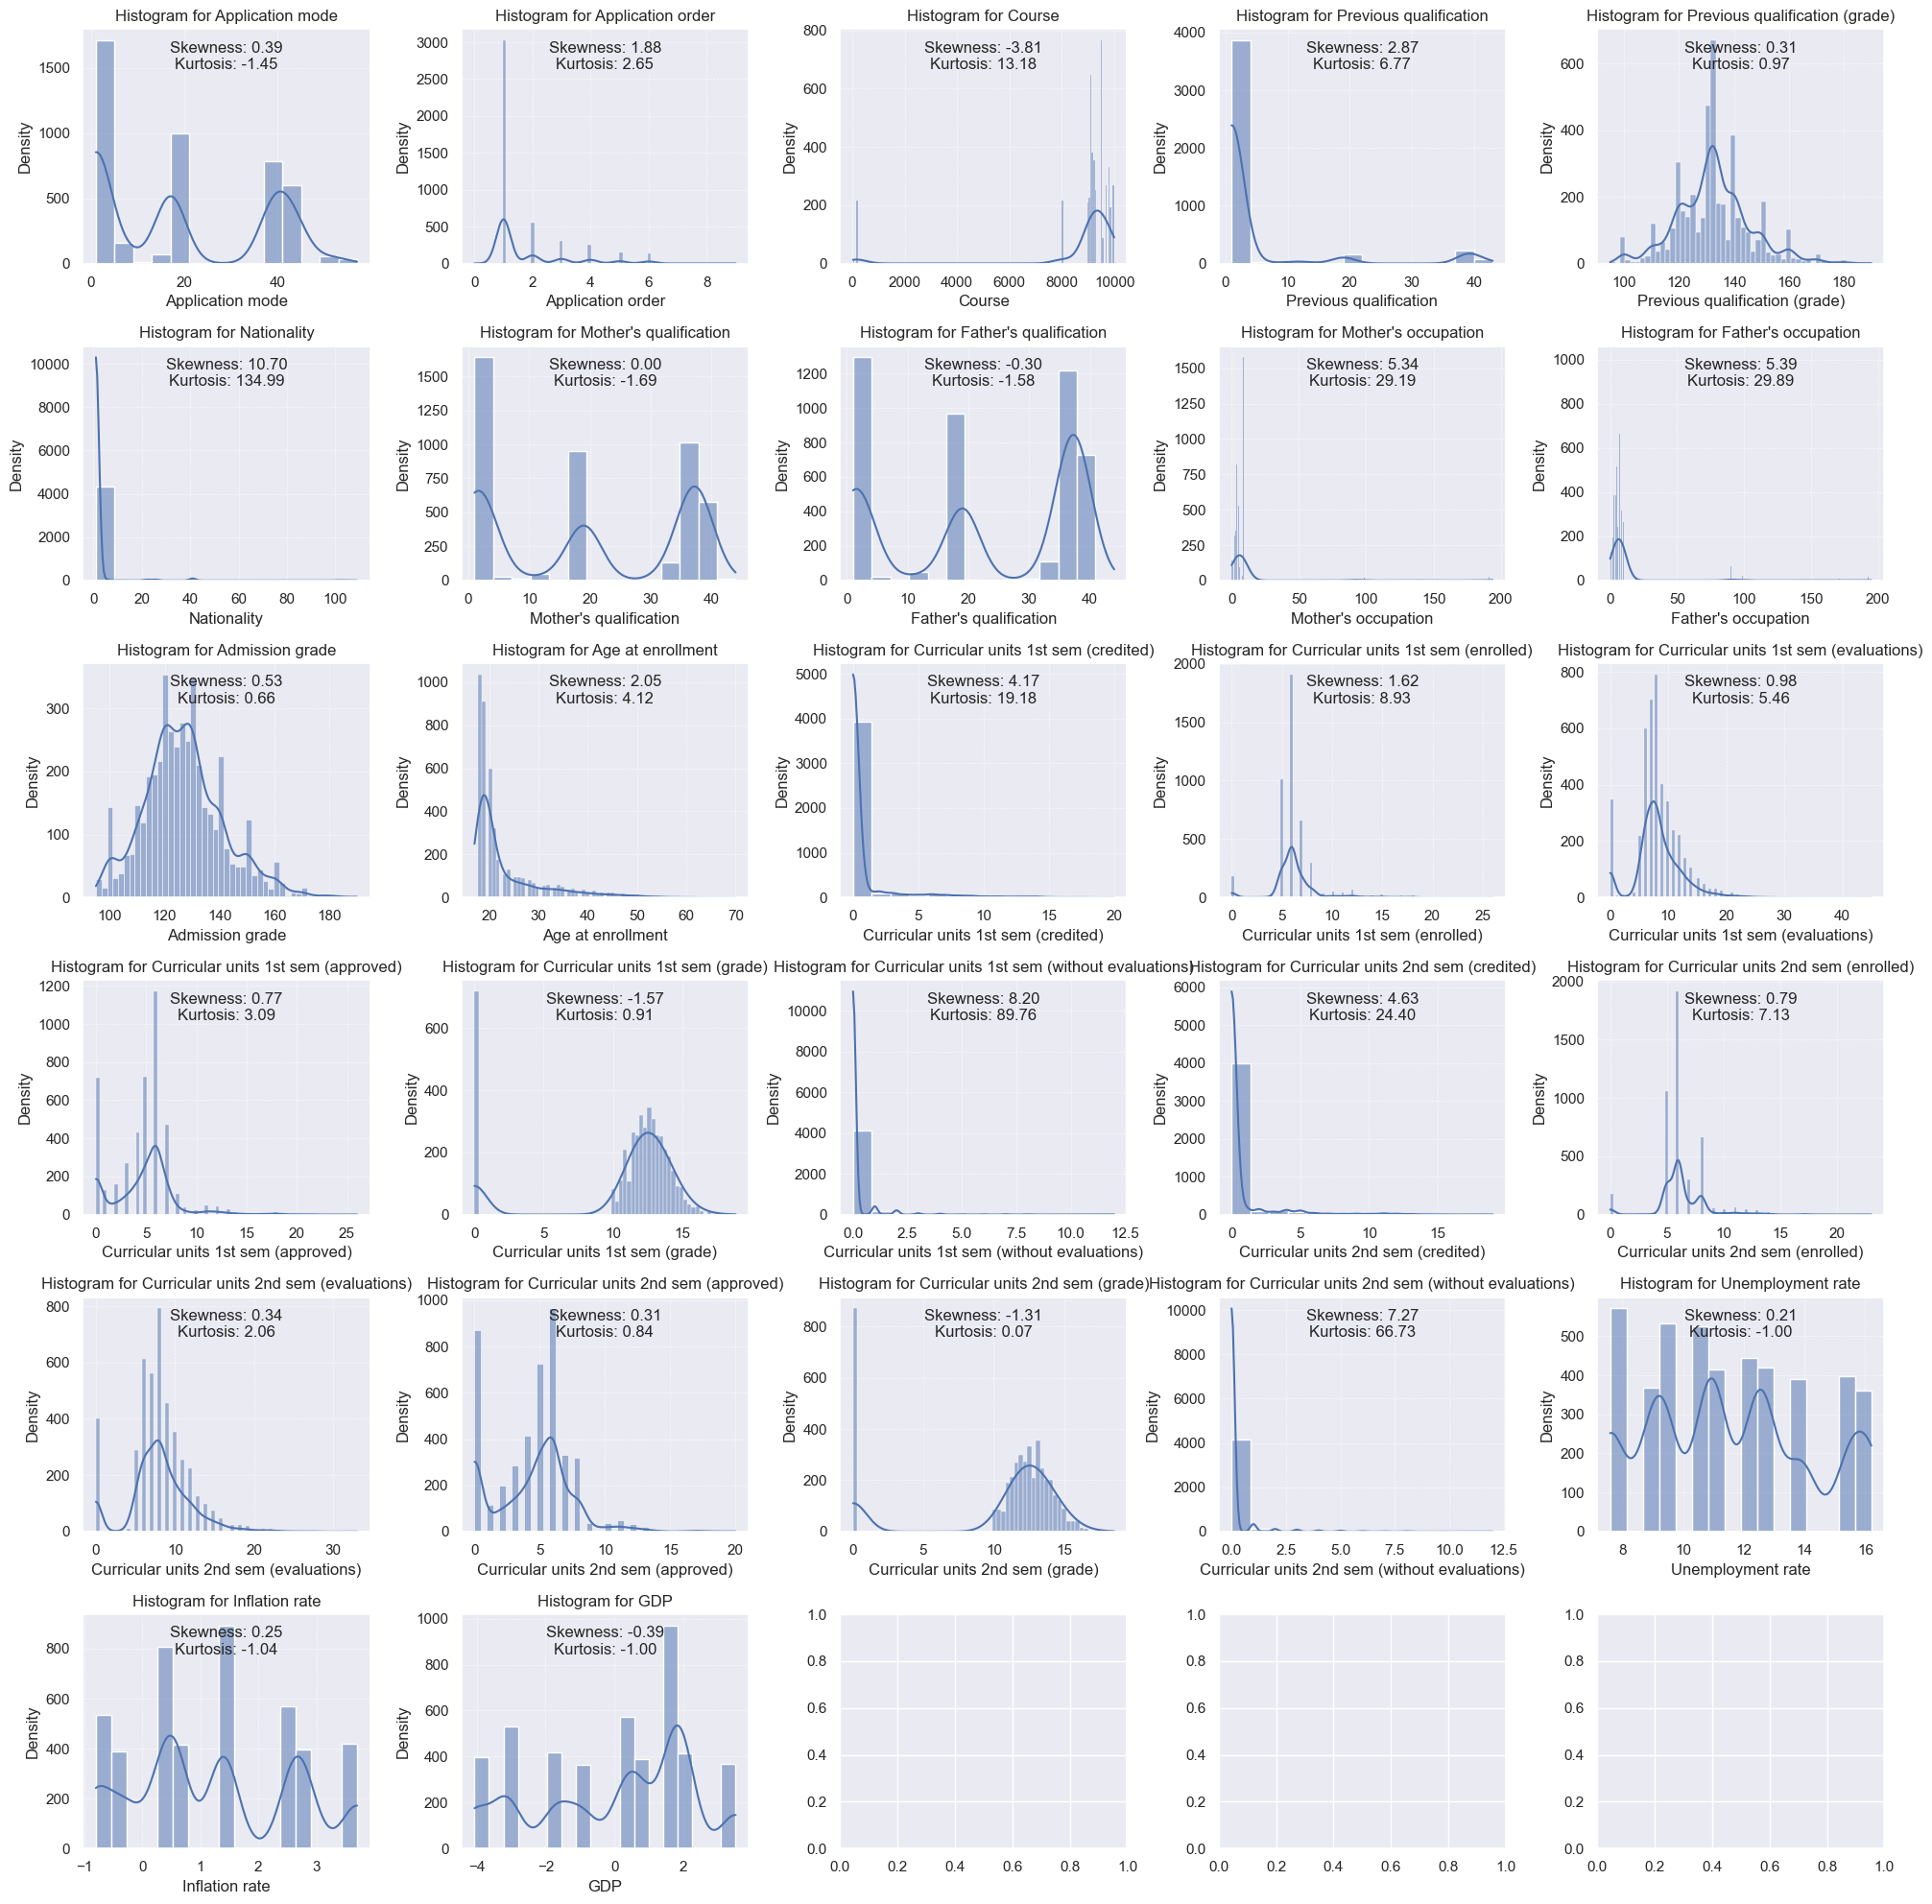

In [103]:
# Set up the figure size for the entire plot
plt.figure(figsize=(30, 30))

# Select all numerical features from the DataFrame (features of type 'int' or 'float')
numerical_features = sub_df.select_dtypes(include=['int', 'float']).columns

# Define the grid size for the subplots (6 rows, 5 columns) and starting subplot index
a = 6  # Number of rows
b = 5  # Number of columns
c = 1  # Initial counter for subplot positioning (not used in the final code)

# Create subplots grid (6x5) with specified figure size
fig, axes = plt.subplots(nrows=a, ncols=b, figsize=(20, 20))

# Flatten the axes array for easy indexing in the loop
axes = axes.flatten()

# Loop through each numerical feature and create a subplot for it
for i, feature in enumerate(numerical_features):
    # Create a histogram with a kernel density estimate (KDE) for the current feature
    sns.histplot(data=sub_df, x=feature, kde=True, ax=axes[i], palette=colors)

    # Add a background grid to the subplot with customized style
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Set the title and axis labels for each subplot
    axes[i].set_title(f'Histogram for {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

    # Calculate and display the skewness of the feature, placing it on the plot
    skewness = stats.skew(df[feature])
    kurtosis = stats.kurtosis(sub_df[feature])

    # Display skewness and kurtosis on the plot
    axes[i].text(0.5, 0.95, f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}',
                 horizontalalignment='center', verticalalignment='top', transform=axes[i].transAxes,
                 fontsize=12)

    # Increment the subplot counter (unused in this code, but kept for clarity)
    c += 1

# Adjust the layout to prevent overlapping of subplots and labels
plt.tight_layout()

# Display the plot with all subplots
plt.show()

### Summary
- Application Mode (Skewness: 0.39):

     - Slightly right-skewed, indicating a fairly even distribution, though there are peaks for specific modes.
- Application Order (Skewness: 1.88):

    - Moderately right-skewed, with most applicants applying in earlier orders, and fewer in later ones.
- Course (Skewness: -3.81):

    - Strong negative skew, meaning most students are clustered around specific courses with fewer students in the higher course numbers.
- Previous Qualification (Skewness: 2.87):

    - Highly right-skewed, suggesting most students have a lower range of previous qualifications, with a few higher values.
- Father's and Mother's Qualification:

    - Father's (Skewness: 0.30) and Mother's (Skewness: 0.31) qualifications are both nearly symmetrical, indicating a more balanced distribution.
- Admission Grade (Skewness: 0.53):

    - Slight right skew, with a higher concentration of students around mid to high admission grades.
- Age at Enrollment (Skewness: 2.05):

    - Strong right skew, meaning the majority of students are younger, with fewer older students.
- Curricular Units (1st and 2nd Semesters):

    - Skewness varies across the different categories:
    - 1st sem (credited) (Skewness: 4.17), 1st sem (enrolled) (Skewness: 1.62), and others show high skewness, indicating most students have lower credit or enrollment counts, with fewer at the higher end.
    - 2nd sem (without evaluations) (Skewness: 8.20) shows extreme right skewness, implying most students have very few units without evaluations.
- Inflation Rate (Skewness: -1.98) and GDP (Skewness: 0.7):

    - Inflation is left-skewed, while GDP shows a mild right skew, indicating more balanced distribution but with some outliers.
- Unemployment Rate (Skewness: 1.02):

    - A moderately right-skewed distribution, indicating more frequent occurrences of lower unemployment rates, with fewer high unemployment periods.

Many of the curricular unit features, previous qualifications, and course data are highly skewed, which might suggest the need for transformations (e.g., log transformations) to normalize the data for analysis.
Parental qualifications and admission grades are closer to normal distributions, implying less need for adjustments.
Tailored Interventions: The heavy skew in certain features (e.g., age, curricular units) could indicate the need for targeted interventions or policies, such as supporting older students or those with fewer curricular credits.

<Figure size 3000x3000 with 0 Axes>

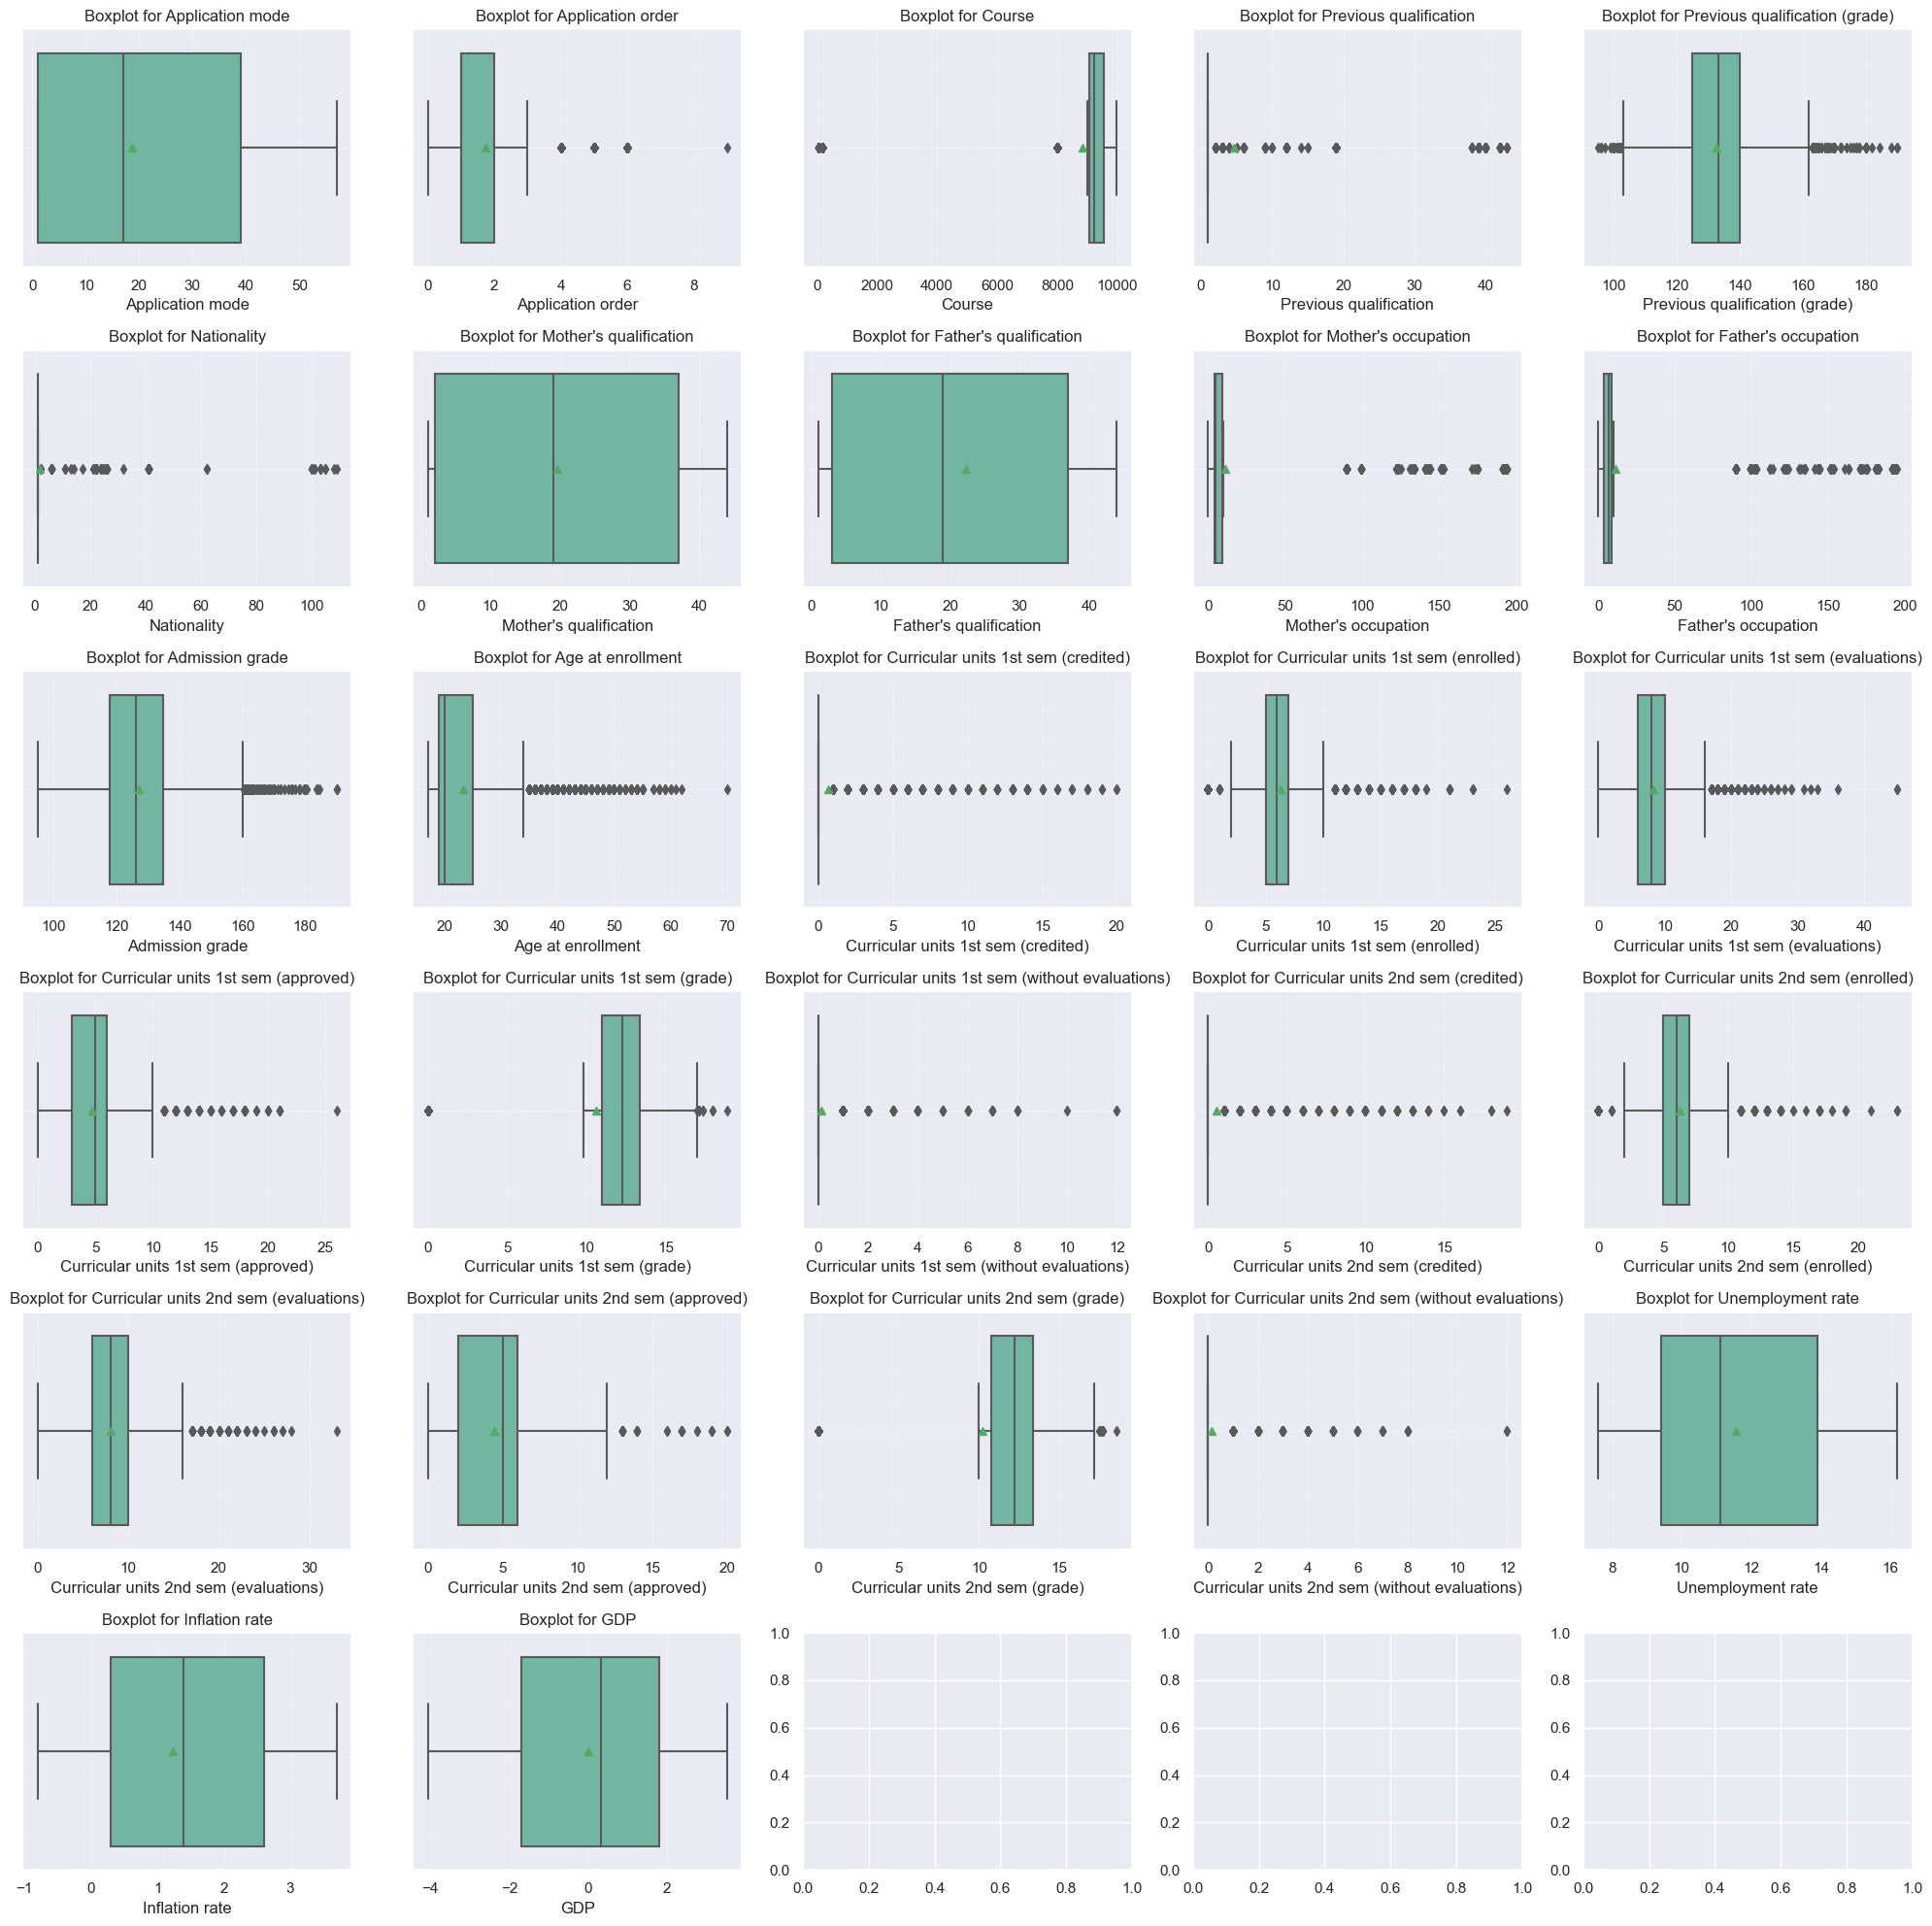

In [104]:
# Set up the matplotlib figure
plt.figure(figsize=(30, 30))


# List of numerical features to plot
numerical_features = sub_df.select_dtypes(include = ['int', 'float']).columns

a = 6
b = 5
c = 1

fig, axes = plt.subplots(nrows=a, ncols=b, figsize=(20, 20))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create subplots for each numerical feature
for i, feature in enumerate(numerical_features):
#     fig, axes =  plt.subplot(a, b, c)
    
    # Create the box plot
    sns.boxplot(data= sub_df, x=feature, ax = axes[i], showmeans = True, palette = colors)
    
    # Add background color and grid
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Add titles and labels
    axes[i].set_title(f'Boxplot for {feature}')
    axes[i].set_xlabel(feature)
    c += 1
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The boxplot above confirms the huge presence of outliers in the numerical columns in the dataset.

In [105]:
# Loop through each column in the DataFrame
for column in sub_df:
    # Print the name of the current column
    print(column, '\n')
    
    # Print the unique values of the current column
    print(sub_df[column].unique(), '\n')


Marital status 

[1, 2, 4, 3, 5, 6]
Categories (6, int64): [1, 2, 3, 4, 5, 6] 

Application mode 

[17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27] 

Application order 

[5 1 2 4 3 6 9 0] 

Course 

[ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119] 

Daytime/evening attendance 

[1, 0]
Categories (2, int64): [0, 1] 

Previous qualification 

[ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14] 

Previous qualification (grade) 

[122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180.  172.  105.  108.  165.  190.  162.  164.
 163.  159.  117.4 175.  133.8 176.  168.  139.3  97.  157.  140.8 184.4
 148.9 109.  174. 

The nature of the Mother's qualification, Father's qualification pair and the Mother's occupation, Father's occupation pair and the way these values betwen them often repeats itself across each pair clearly indicates that these variables are categorical. These variables will be converted to their appropriate datatype later.

In [106]:
def z_score_outlier_detection(data, threshold=3):
    """
    Detect outliers in a dataset using the Z-score method.

    Parameters:
    - data: array-like or list of numerical values
        The dataset for which outliers are to be detected.
    - threshold: float, optional (default=3)
        The Z-score value above which a data point is considered an outlier.

    Returns:
    - outliers: Pandas Series
        The data points that are considered outliers.
    """
    # Calculate the mean of the data
    mean = np.mean(data)

    # Calculate the standard deviation of the data
    std_dev = np.std(data)

    # Compute the Z-scores for each data point
    z_scores = (data - mean) / std_dev

    # Identify the outliers where the absolute Z-score is greater than the threshold
    outliers = data[np.abs(z_scores) > threshold]

    return outliers

In [107]:
# Iterate over each column in the list of numerical features
for cols in numerical_features:
    # Apply the Z-score outlier detection function to the current column
    outliers = z_score_outlier_detection(sub_df[cols], threshold=3)
    
    # Print the name of the current column
    print(cols, '\n')
    
    # Print the detected outliers for the current column
    # Convert the outliers to a NumPy array and print them
    print(outliers.values, '\n')


Application mode 

[] 

Application order 

[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 9 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6] 

Course 

[171 171  33 171 171 171 171 171 171 171 171 171 171 171  33 171 171 171
 171 171 171  33  33 171 171 171 171 171 171 171 171 171 171 171 171 171
 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171
 171 171 171 171 171 171 171 171 171 171 171 171 171  33 171 171 171 171
 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171
 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171
 171 171 171 171 171 171  33 171 171 171 171 171 171 171 171 171 171 171
 171 171 171 171 171 171  33 171 171 171 171 171 171 171 171 171 171 171
 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171
 171 17

The constant recurrence of the outliers in columns such as 'Application order', 'Nationality', 'Course', 'Application mode', 'Previous qualification', 'mother's qualification', 'father's qualification' are very much categorical variables. This will be converted to the appropriate data types.



To mitigate the effect of outliers in the numerical columns, each numerical values will be transformed using log transformation before data modeling. This will help to reduce the effect of these extreme values.

In [108]:
def convert_to_categorical(df, columns):
    for col in columns:
        df[col] = df[col].astype('category')
    return df

columns_to_convert = [
    'Application order', 'Nationality', 'Course', 'Application mode', 
    'Previous qualification', "Mother's qualification", "Father's qualification", 
    "Mother's occupation", "Father's occupation"
]

sub_df = convert_to_categorical(sub_df, columns_to_convert)

# Check the data types
sub_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   category
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance                      4424 non-null   category
 5   Previous qualification                          4424 non-null   category
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nationality                                     4424 non-null   category
 8   Mother's qualification                          4424 non-null   category
 9   Father's qualification        

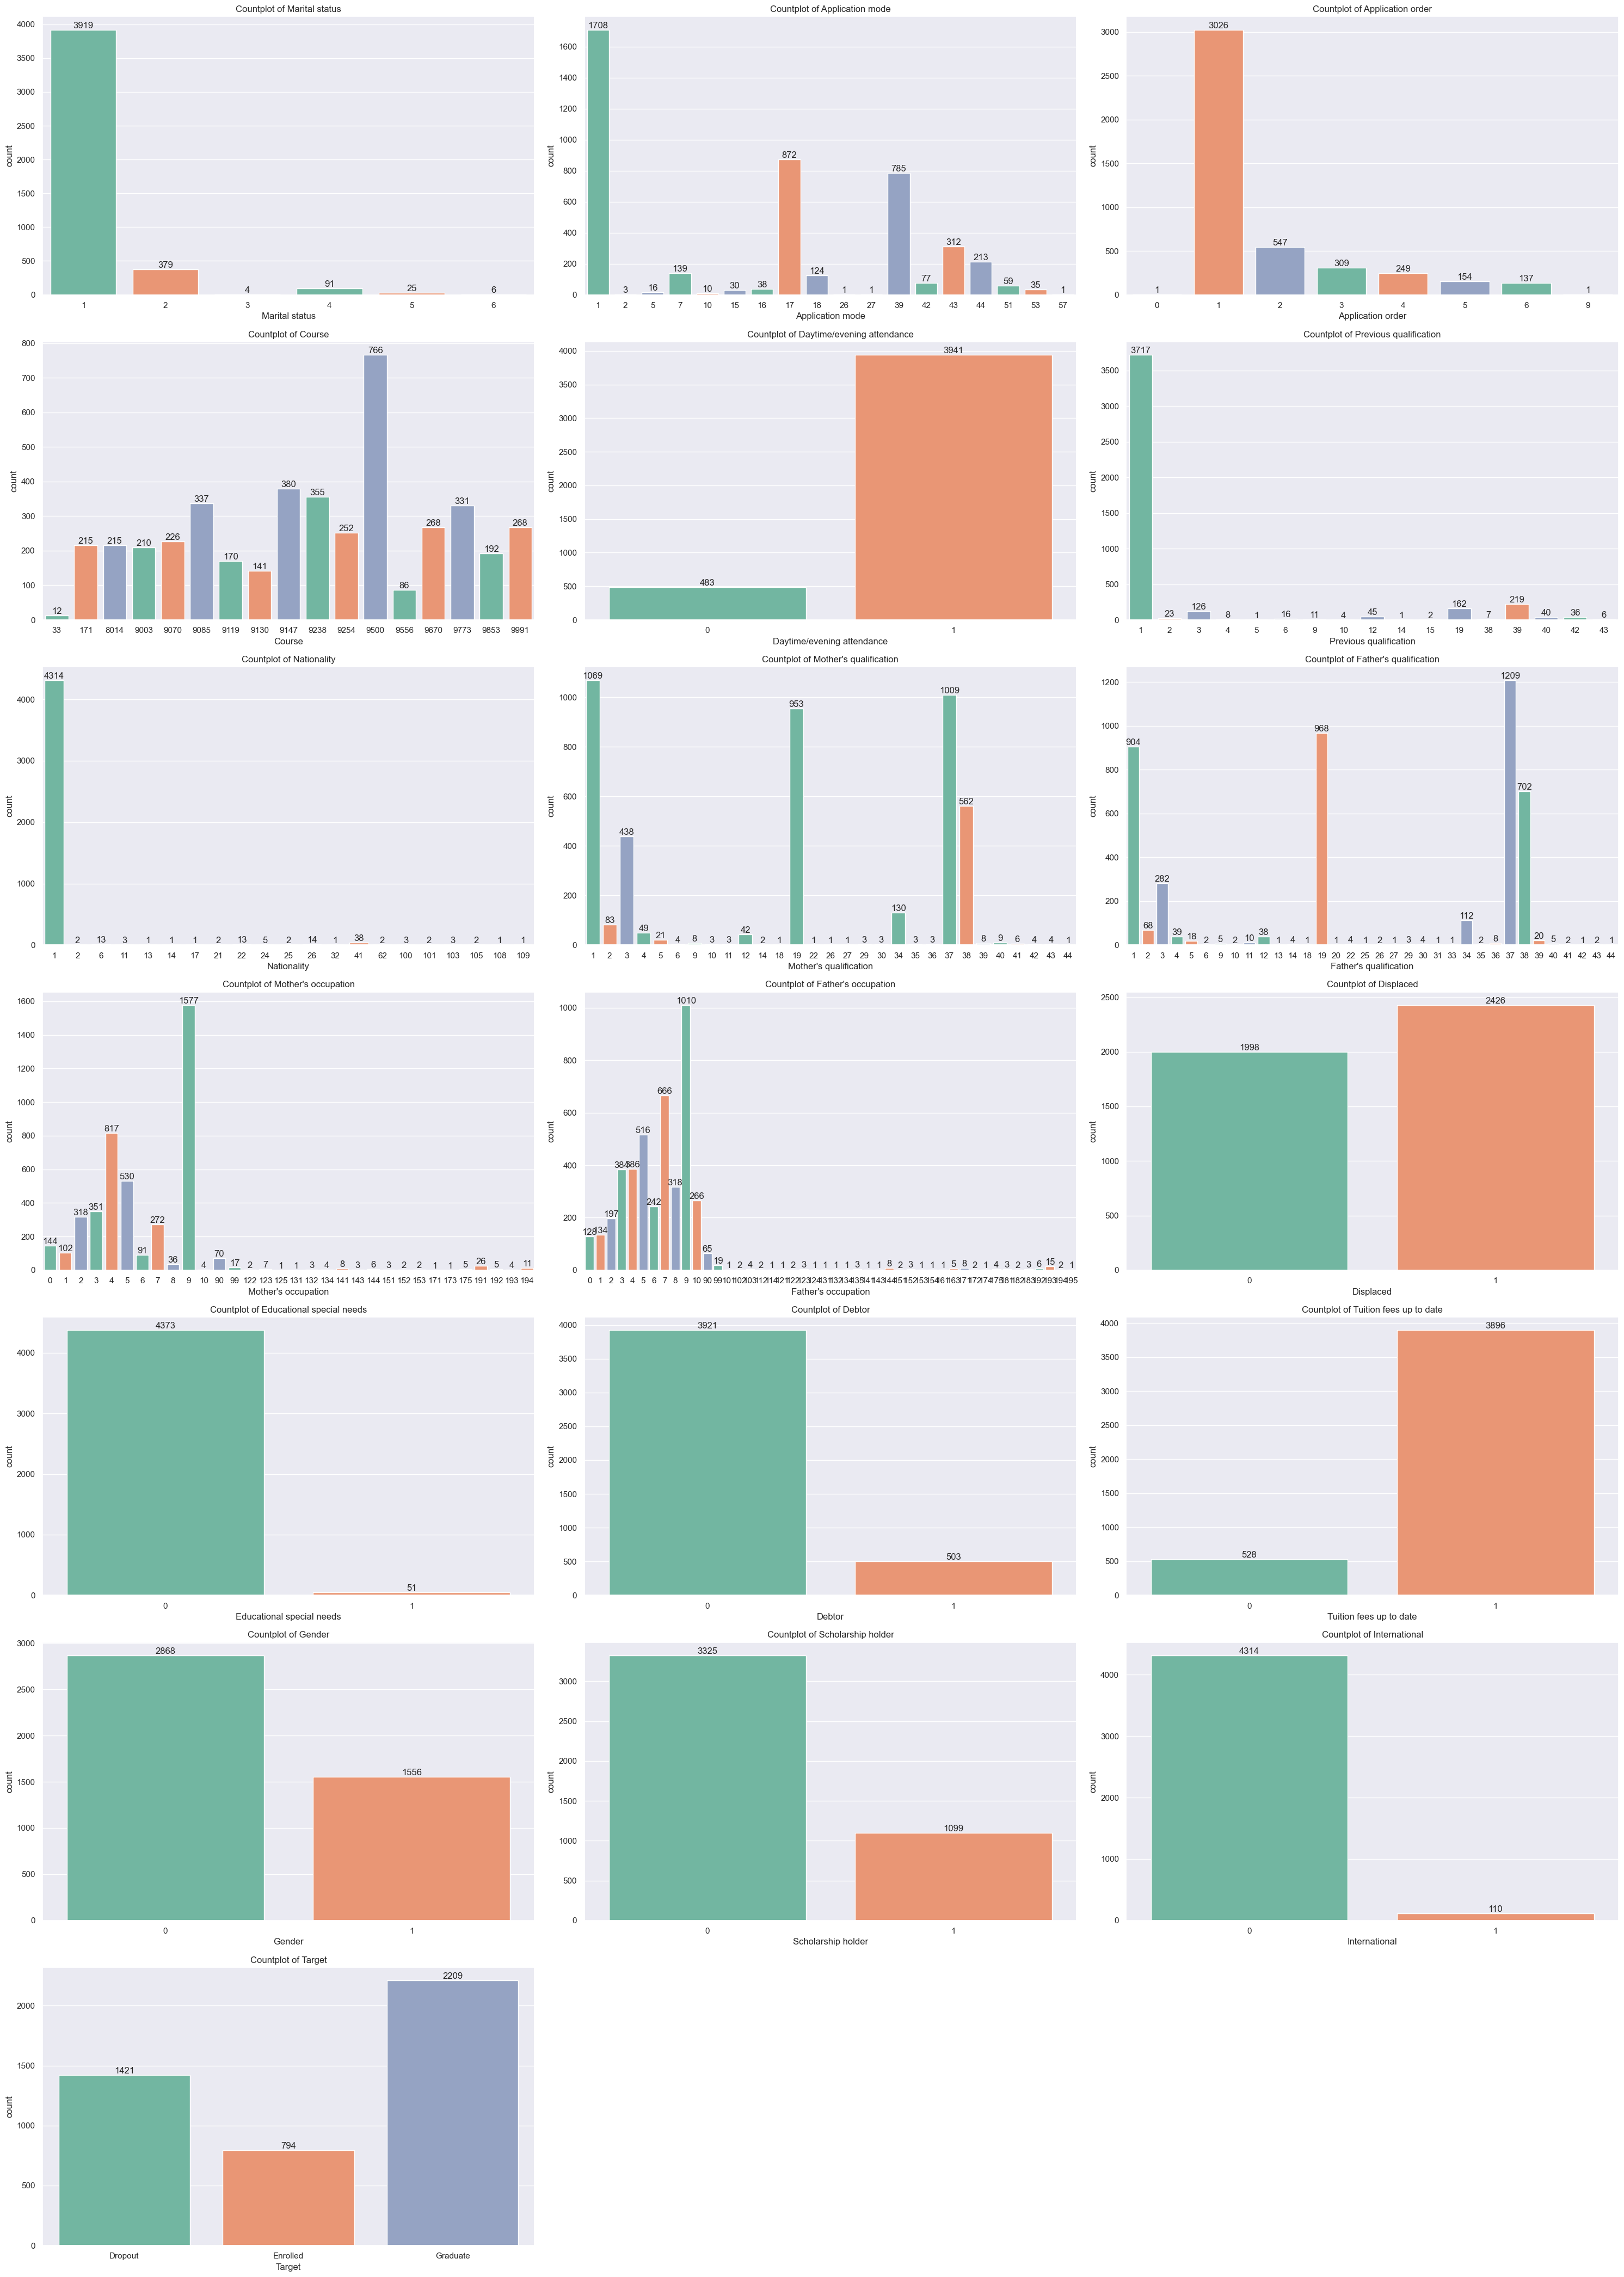

In [109]:
# Select categorical columns
cat_df = sub_df.select_dtypes(exclude=['int', 'float'])

# Number of columns for the grid
b = 3  # Number of columns
a = (len(cat_df.columns) // b) + 1  # Calculate rows based on number of columns

# Initialize the plot counter
c = 1
sns.set()

# Create the figure
fig = plt.figure(figsize=(30, a * 6))  # Adjust height based on rows
for i in cat_df.columns:
    plt.subplot(a, b, c)
    plt.title(f'Countplot of {i}')
    plt.xlabel(i)
    
    # Plot the countplot
    ax = sns.countplot(data=cat_df, x=i, palette = colors)
    
    # Add labels to the bars
    for container in ax.containers:
        ax.bar_label(container)
    
    c += 1

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


The dataset reveals several key trends about the student population. Most students are single, indicating that the majority are likely younger and unmarried. In terms of application mode, while there are multiple options, one stands out as the most popular, suggesting a preferred way of applying. Similarly, a large portion of students apply during the first application order, hinting at either the benefits of applying early or a general preference for doing so.

When it comes to academic engagement, most students exhibit full attendance, which could be tied to better academic performance or a lower risk of dropping out. A significant finding is that many students' parents have low or no formal qualifications, which might reflect socio-economic barriers that influence their children’s academic success. 

In terms of special educational needs, only a small minority of students require such support, meaning most of the population doesn’t face those additional challenges. However, a considerable number of students have unpaid tuition fees, which might serve as a strong predictor of dropout, as financial instability often plays a role in student retention. Similarly, while many students have paid their fees on time, a notable portion has not, reinforcing the potential link between financial stability and staying in school.

A significant number of students are not on scholarships, which may contribute to their financial challenges, and although most students eventually graduate, the number of dropouts is still substantial, signaling an ongoing issue. Financial struggles, parental education, and application timing all appear to play significant roles in influencing whether students stay in school or drop out.

# Bivariate Analysis

In [110]:
def bivariate_scatterplot(data, x_variable, y_variable, hue=None, reg_line=None):
    """
    This function creates a scatterplot to visualize the relationship between two variables in a dataset.

    Args:
        data: The DataFrame containing the data to be visualized.
        x_variable (str): The name of the column containing the data for the x-axis.
        y_variable (str): The name of the column containing the data for the y-axis.
        hue (str, optional): The name of the column to use for color coding the data points. Defaults to None.
        reg_line (bool, optional): Whether to include a regression line on the plot. Defaults to None.

    Returns:
        None
    """

    # Set the figure size
    plt.figure(figsize=(8, 6))

    # Set a color palette
    colors = sns.color_palette('Set2')

    # Create the scatterplot
    sns.scatterplot(data=data, x=x_variable, y=y_variable,
                    s=80, hue=hue, palette=colors)

    # Add a regression line if specified
    if reg_line:
        sns.regplot(data=data, x=x_variable, y=y_variable, scatter=False,
                    color='black', line_kws={'label': 'Regression Line'})

        # Add labels and title
        plt.title(f'Scatterplot of {y_variable} vs {x_variable}')
        plt.xlabel(x_variable)
        plt.ylabel(y_variable)

        # Display the plot
        plt.show()

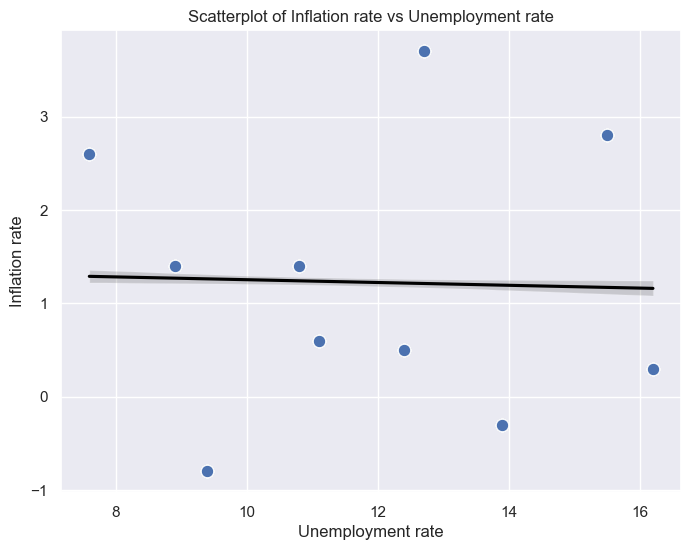

In [111]:
# Analyzing the relationship between unemployment rate and inflation rate
bivariate_scatterplot(sub_df, 'Unemployment rate', 'Inflation rate', hue=None, reg_line=True)

Key Insights
- There appears to be a weak or no correlation between inflation rate and unemployment rate. The data points are scattered fairly randomly, without a clear linear trend.
- The regression line, while fitted to the data, is relatively flat, further indicating a weak relationship between the two variables.

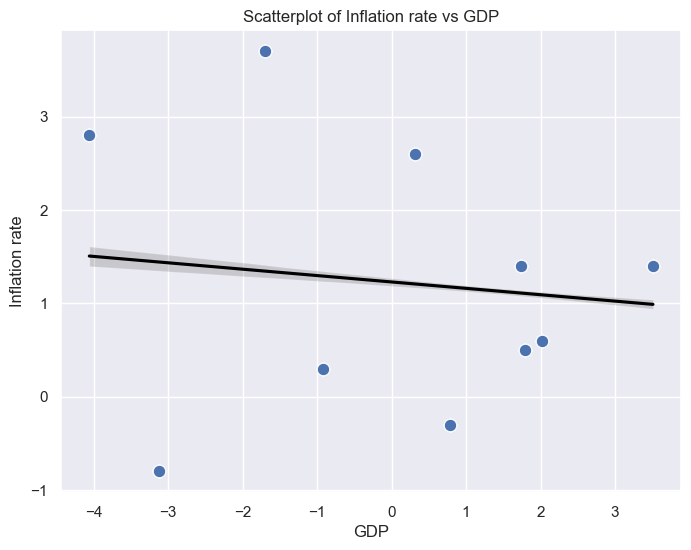

In [112]:
# Analyzing the relationship between GDP and inflation rate
bivariate_scatterplot(sub_df, 'GDP', 'Inflation rate', hue=None, reg_line=True)

Key Insights
- There appears to be a weak negative correlation between inflation rate and GDP. As GDP increases, inflation rate tends to decrease slightly.
- The regression line slopes slightly downward, confirming the negative correlation.

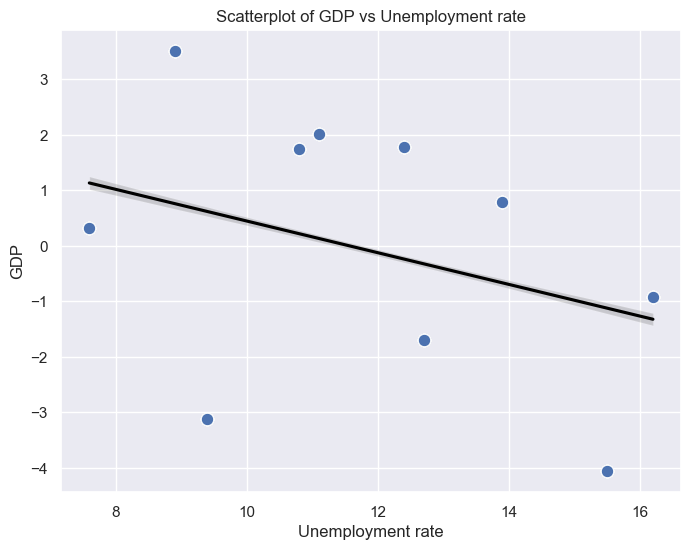

In [113]:
# Analyzing the relationship between Unemployment rate and GDP
bivariate_scatterplot(sub_df, 'Unemployment rate', 'GDP', hue=None, reg_line=True)

Key Insights
- There appears to be a negative correlation between GDP and unemployment rate. As unemployment rate increases, the gross domestic product reduces.
- The regression line, while fitted to the data, slopes downwards, further indicating a negative relationship between the two variables.

In [114]:
def pie_bar_plot(df, col, Response_col):
    """
    Creates a side-by-side pie chart and bar plot for the given DataFrame columns.
    
    Parameters:
    - df: DataFrame
        The DataFrame containing the data.
    - col: str
        The column name for which to create the pie chart and bar plot.
    - Response_col: str
        The column name for the response variable to be used for hue in the bar plot.
    """
    # Check if the specified columns exist in the DataFrame
    if col not in df.columns or Response_col not in df.columns:
        raise ValueError(f"One or both columns '{col}' or '{Response_col}' do not exist in the DataFrame.")
    
    # Set up the figure with a specific size
    plt.figure(figsize=(15, 6))

    # Extract and sort value counts for the specified column
    value_counts = df[col].value_counts().sort_index()

    # First subplot: Pie chart
    plt.subplot(1, 2, 1)
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2')

    # Create the pie chart with a "donut" style
    wedges, texts, autotexts = plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, 
                                       startangle=90, colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    # Adding legend for the pie chart
    plt.legend(wedges, ax1.index, title=col, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    ax2 = sns.countplot(data=df, x=col, hue=Response_col, palette=colors)
    plt.title(f"Target by {col}", fontweight="black", size=14, pad=15)
    plt.xlabel(col, size=12)
    plt.ylabel("Count", size=12)

    # Calculate the total count to compute percentages
    total = df.shape[0]

    # Add value and percentage annotations to each bar
    for p in ax2.patches:
        value = p.get_height()
        percentage = f'{100 * value / total:.2f}%'
        ax2.annotate(f'{value}\n({percentage})',  # Add value and percentage
                     (p.get_x() + p.get_width() / 2., value),  # Center text over the bar
                     ha='center', va='center',                  # Horizontal and vertical alignment
                     xytext=(0, 9),                            # Distance from bar (move text slightly above bar)
                     textcoords='offset points', fontsize=10)   # Use offset for placement
    
    # Adjust legend position to prevent overlap
    plt.legend(title=Response_col, loc="upper right")

    # Adjust layout to prevent overlapping subplots
    plt.tight_layout(pad=3.0)

    # Display the plots
    plt.show()


In [115]:
def hist_with_hue(df, col, response_col):
    """
    Creates side-by-side plots: a histogram with hue and a boxplot.
    
    Parameters:
    - df: DataFrame
        The DataFrame containing the data.
    - col: str
        The column name for which to create the histogram and boxplot.
    - response_col: str
        The column name to be used for hue in the histogram and as x-axis in the boxplot.
    """
    # Set up the figure with a specified size
    plt.figure(figsize=(15, 6))
    
    # First subplot: Histogram with hue
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=response_col, data=df, kde=True, palette='Set2')
    
    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()  # Get the current Axes instance
    plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels by 90 degrees and center-align
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)
    
    # Second subplot: Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=response_col, y=col, data=df, palette='Set2', showmeans=True)
    plt.title(f"Distribution by {col} & {response_col}", fontweight="black", size=14, pad=10)
    
    # Adjust layout to prevent overlapping subplots
    plt.tight_layout()
    
    # Display the plots
    plt.show()


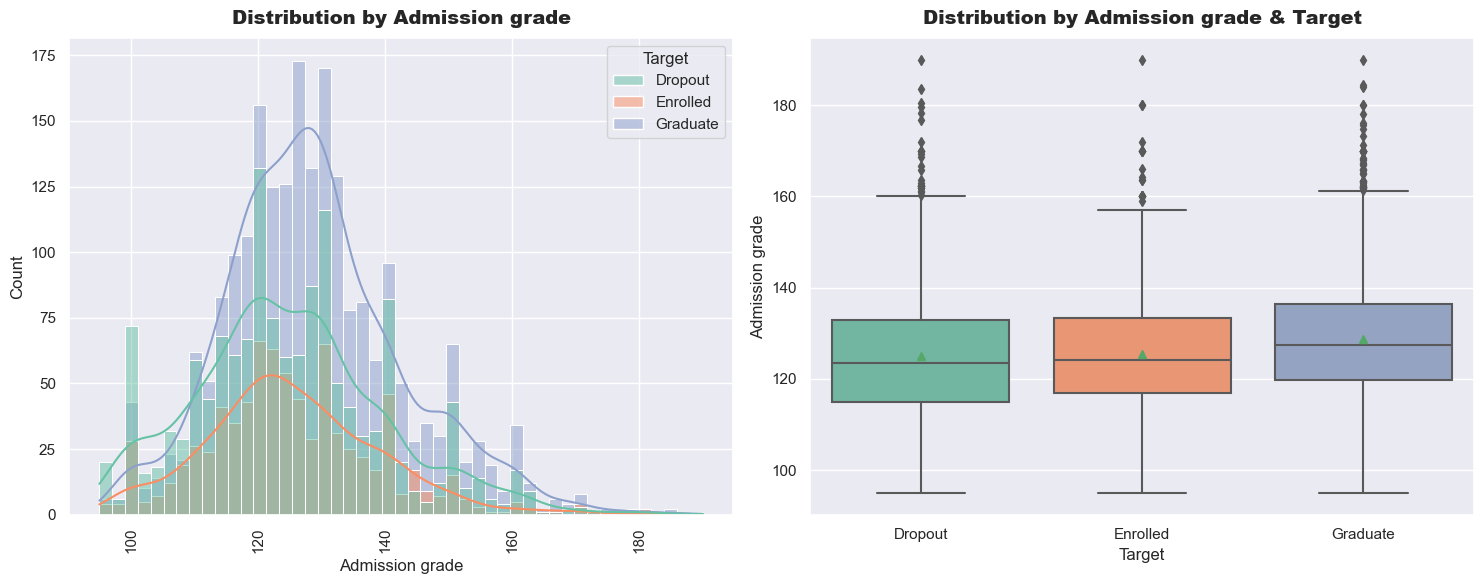

In [116]:
# Plotting the histogram and boxplots of the admission grade by Target.
hist_with_hue(sub_df, 'Admission grade', 'Target')

Key Insights


- Graduates typically have higher admission grades, clustering around 120-160, with the highest densities in the 130-150 range.
- Dropouts have a wider spread, with many having lower grades around 100-140.
- Enrolled students show a more balanced, lower distribution, with fewer peaks compared to graduates or dropouts.
- Graduates have the highest median admission grade, followed by enrolled students, with dropouts having the lowest.

Higher admission grades seem to lead to better outcomes, with graduates consistently having higher scores. Students with lower grades are more likely to drop out.

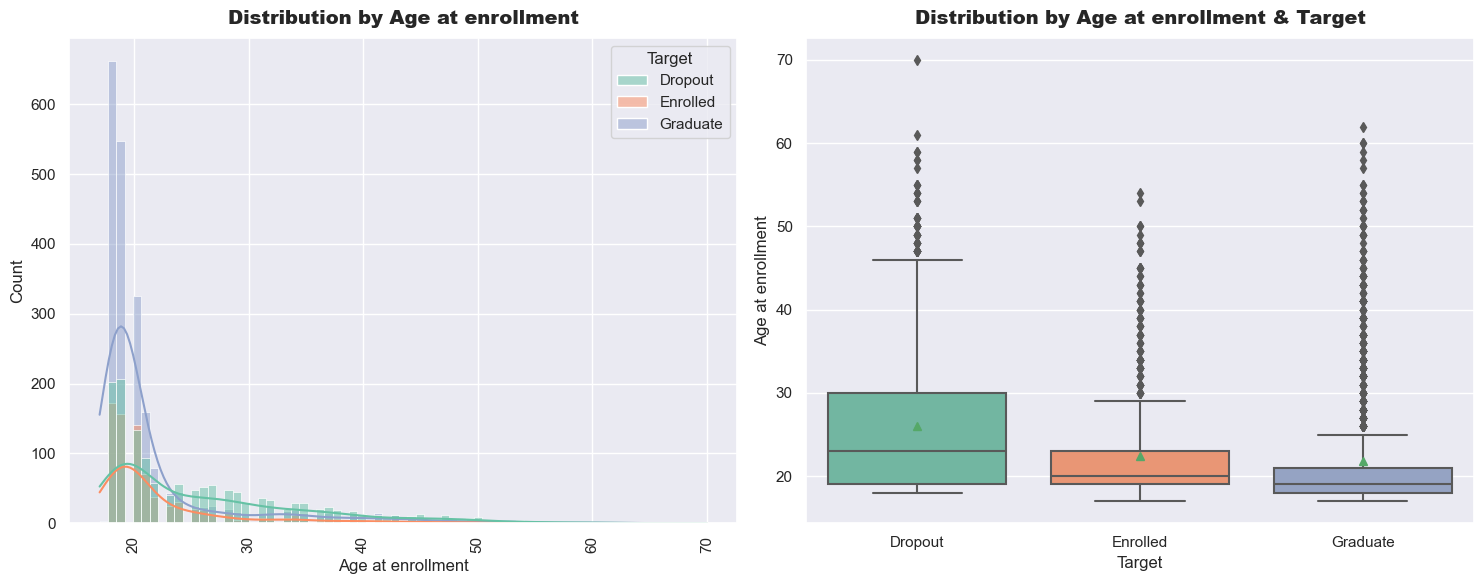

In [117]:
# Plotting the histogram and boxplots of the Age at enrollment by Target.
hist_with_hue(sub_df, 'Age at enrollment', 'Target')

Key Insights


- Most students, regardless of outcome, enroll in their early 20s, with a sharp decline in enrollment as age increases.
- Graduates dominate the younger age groups, especially around 18-22. typically enroll in their early 20s, similar to enrolled students, but there are outliers up to age 60.
- Dropouts are more common among older age groups compared to graduates.They also tend to enroll later, with a median age around 25 and some enrolling even into their 60s.
- Enrolled students have a fairly even, though smaller, presence across all age ranges.They are younger, with a median age of around 21.

Younger students are more likely to graduate, while older students show higher dropout rates.

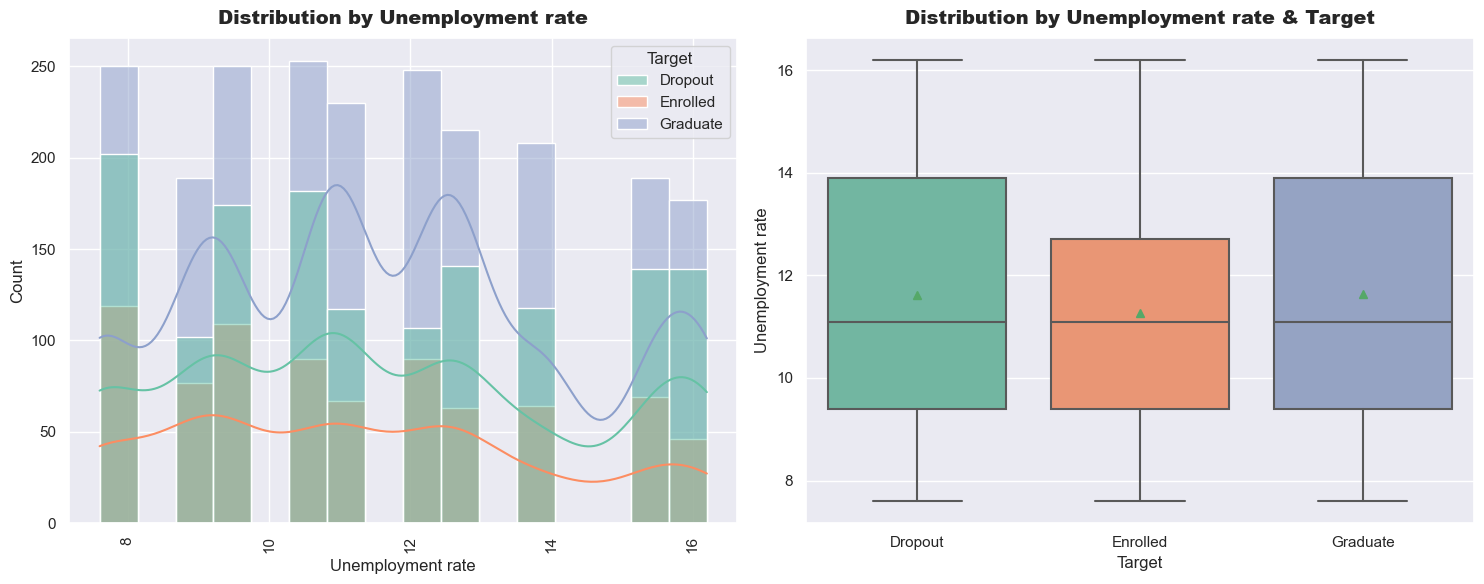

In [118]:
# Plotting the histogram and boxplots of the Unemployment rate by Target.
hist_with_hue(sub_df, 'Unemployment rate', 'Target')

Key Insights

- Graduates tend to come from areas with higher unemployment (10-16%), possibly because tough job markets keep students in school longer.
- Dropouts are spread across different unemployment levels, with a slight concentration around mid-level rates (10-14%).
- Enrolled students consistently experience around 11-12% unemployment, showing less variation than the other groups.

In summary, higher unemployment may push students to graduate, while dropouts happen across a range of unemployment conditions.

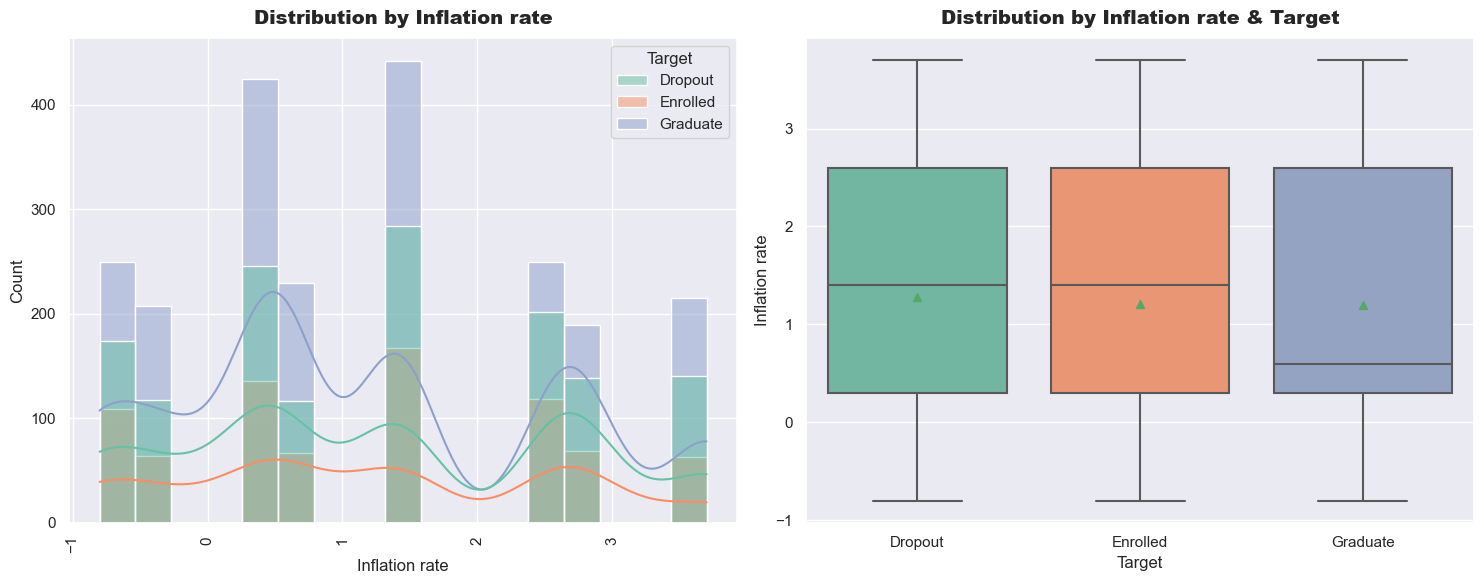

In [119]:
# Plotting the histogram and boxplots of the Inflation rate by Target.
hist_with_hue(sub_df, 'Inflation rate', 'Target')

Key Insights
- Dropouts tends to have a slightly lower average inflation rate compared to the other groups.
- Enrolled students distribution is somewhat similar to Dropout, but with a slightly higher average inflation rate.
- Graduates seems to have the highest average inflation rate, suggesting that individuals or entities experiencing higher inflation rates are more likely to be graduates.

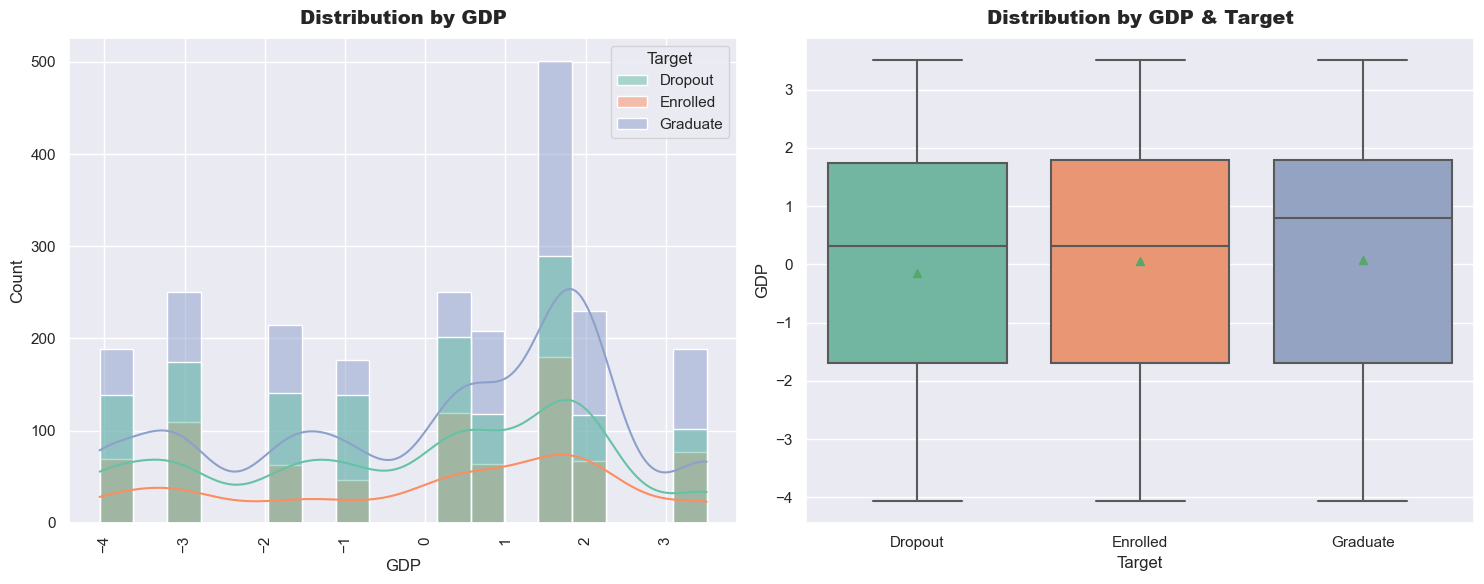

In [120]:
# Plotting the histogram and boxplots of the GDP by Target.
hist_with_hue(sub_df, 'GDP', 'Target')

Key Insights

- Dropouts appears to have a slightly lower average GDP compared to the other groups.
- Enrolled sudent's distribution is somewhat similar to Dropout, but with a slightly higher average GDP.
- Graduate seems to have the highest average GDP, suggesting that individuals or entities with higher GDP are more likely to fall into this target category.
The mean GDP on average increases from dropout to Graduate with Graduates having the higher mean GDP which makes the GDP a good predictor of the 'Target' variable.

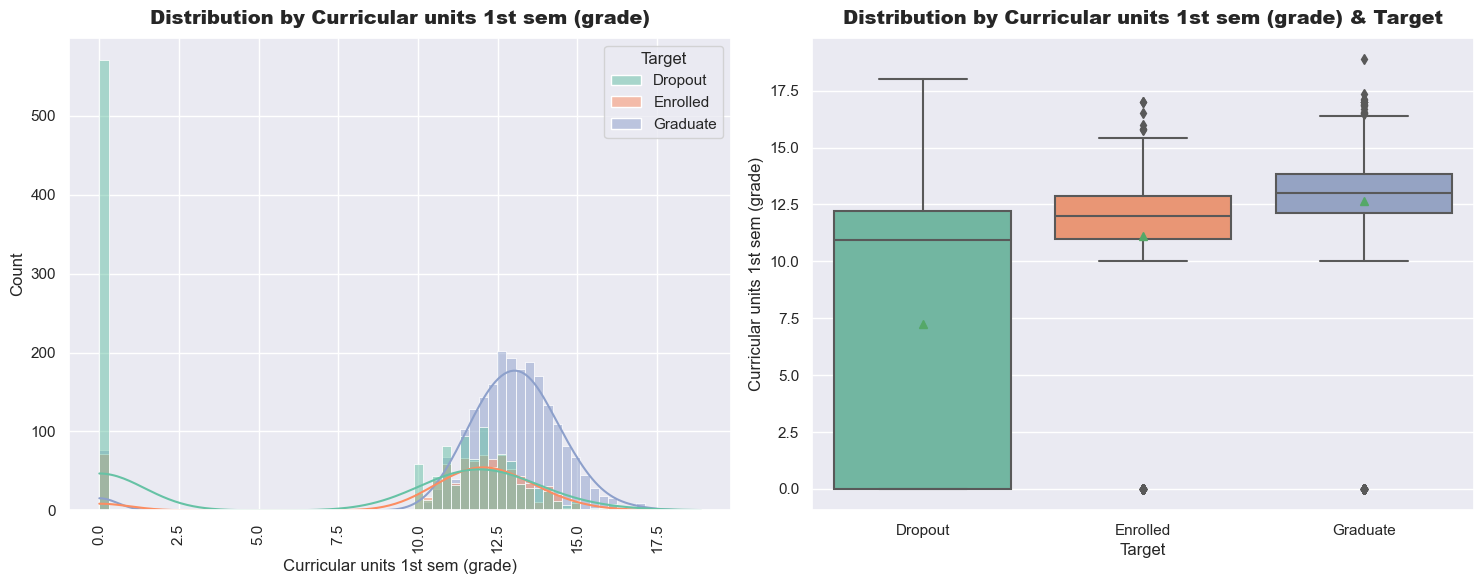

In [121]:
# Plotting the histogram and boxplots of the Curricular units 1st semester grade by Target.
hist_with_hue(sub_df, 'Curricular units 1st sem (grade)', 'Target')

Key Insights

- Dropouts have a slightly lower average grade compared to the other groups.
- Enrolled students distribution is somewhat similar to Dropout, but with a slightly higher average grade.
- Graduates seems to have the highest average grade, suggesting that students with higher grades are more likely to fall into this target category.

Dropouts on average, tends to have a lower 1st semester grade than the other categories.

In [122]:
# Creating a column to hold the average curricular units or grade
sub_df['Average curricular units'] = (sub_df['Curricular units 1st sem (grade)'] + sub_df['Curricular units 2nd sem (grade)']) / 2

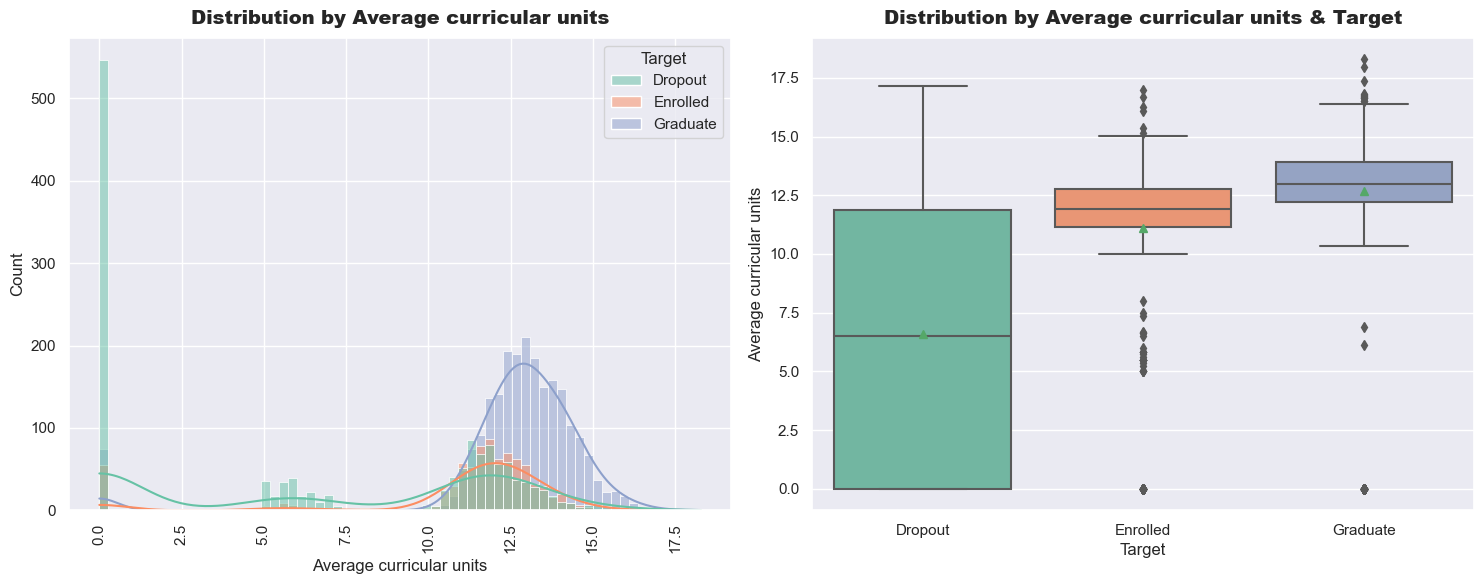

In [123]:
# Plotting the histogram and boxplots of the Average curricular units by Target.
hist_with_hue(sub_df, 'Average curricular units', 'Target')

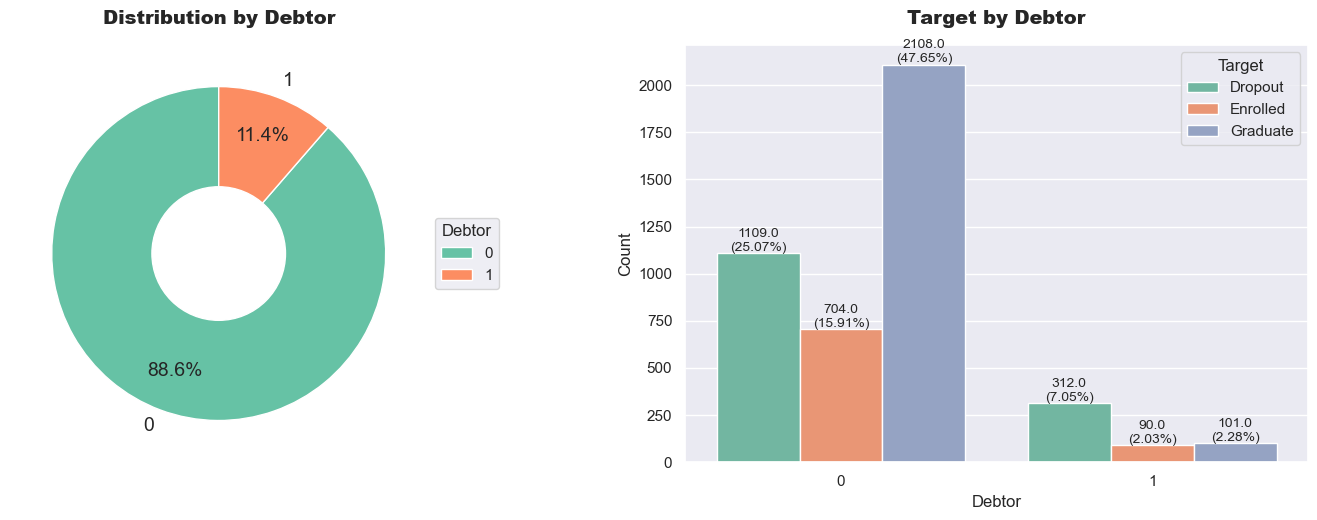

In [124]:
# Plotting the pie chart and barplot of the Debtor by Target.
pie_bar_plot(sub_df, 'Debtor', 'Target')

Key Insights


The majority of students are not debtors i.e 88.6% of the students while the remaining 11.4% are debtors.
For the category of students who are not debtors, the graduates are the most frequent followed by the dropout category of students. For the category of students who owe, this observation is reversed with the dropout students being the most frequent.

This shows that majority of students who are on not debtors tends to graduate.

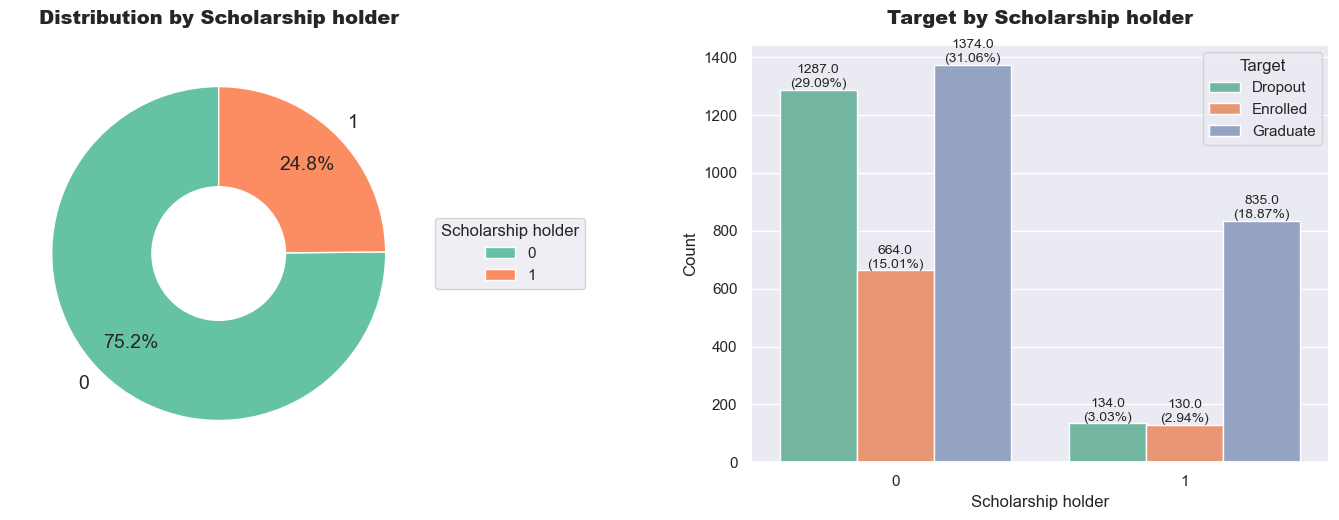

In [125]:
# Plotting the pie chart and barplot of the Scholarship holder by Target.
pie_bar_plot(sub_df, 'Scholarship holder', 'Target')

Key Insights


The majority of students are not scholarship holders i.e 75.2% of the students while the remaining 24.8% are scholarship holders.
For the category of students who are not scholarship holders, the graduates (31.06%) are the most frequent closely followed by the dropout category of students (29.09%). For the category of students who are scholarship holders, the graduate category still remains the most frequent.

This shows that majority of students who are on scholarships tends to graduate.

# Correlation Analysis

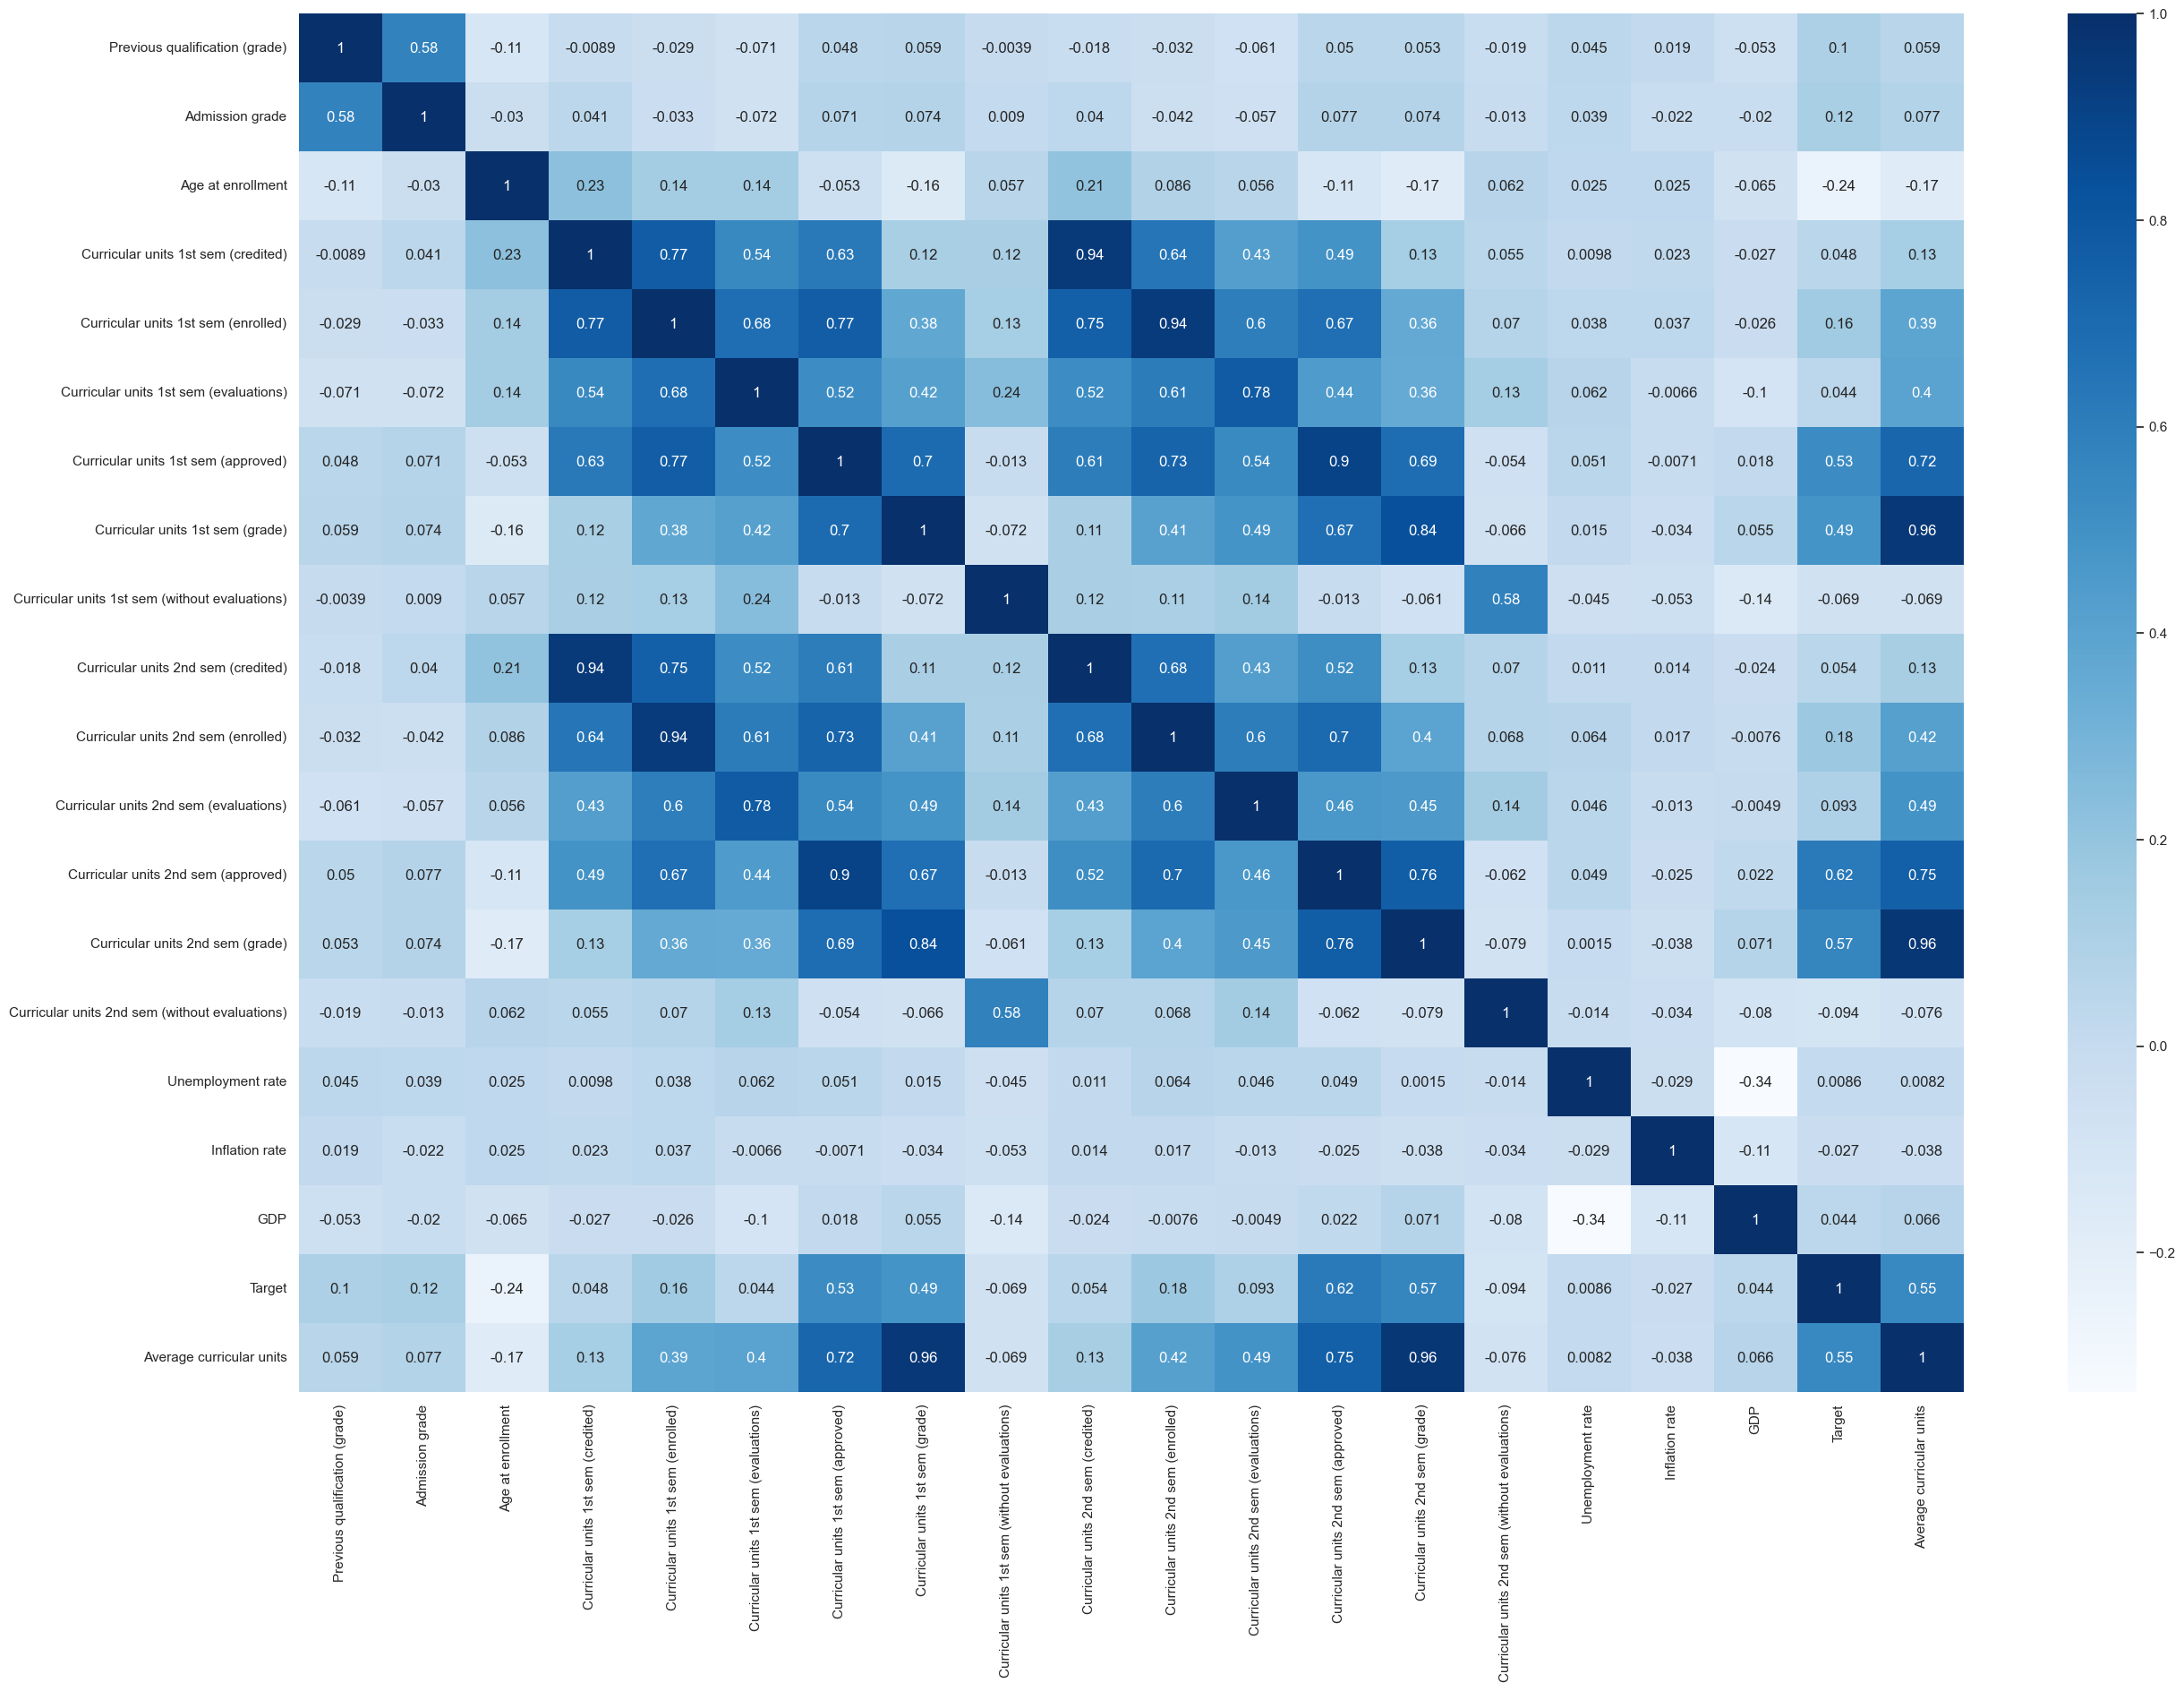

In [126]:
# Replace categorical values in 'Target' column with numerical values and convert to integer type
sub_df['Target'] = sub_df['Target'].replace({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}).astype('int')

# Set up the matplotlib figure with a specified size
plt.figure(figsize=(30, 20))

# Create a heatmap of the correlation matrix of the DataFrame
sns.heatmap(sub_df.corr(), annot=True, cmap='Blues')

# Display the plot
plt.show()


## Hypothesis Test 1

### Question: Does higher socio-economic status correlates with lower dropout rates?

The socio-economic variables in the dataset includes the Unemployment rate, Inflation rate, the Gross Domestic Product (GDP), the 'Debtor' and the 'Tuition fees up to date'. An hypothesis test of the correlation between these variables and the likelihood of dropping out.


To conduct this hypothesis test, a new column called the 'drop_stats' column will be created from the 'Target' column. This column will specify if the student is a dropout or not. The 'enrolled' and the 'graduate' values in this column will be set to 0 indicating that these set of students are not dropout and 1 if otherwise. 

In [127]:
# Creating an indicator column called drop_stats, 0 represents a student who didnot drop out and 1 represents a drop out
sub_df['drop_stats'] = np.where(sub_df['Target'] == 0, 1, 0)

In [128]:
def biserial_correlation_test(x, y, test_name, alpha=0.05):
    """
    Perform a Pearson correlation coefficient test and store the results in a list for tabulation.
    
    Parameters:
    - x: list or numpy array, the first variable
    - y: list or numpy array, the second variable
    - test_name: string, a name or label for the current test
    - alpha: float, the significance level (default = 0.05)
    
    Returns:
    - None, but appends the results to the global test_results list
    """
    # Calculate biserial correlation coefficient and p-value 
    r, p_value = stats.pointbiserialr(x, y)
    
    hypothesis = 'H0: r = 0 vs. H1: r ≠ 0'
    
    # Determine the conclusion based on the p-value
    conclusion = "Reject H0" if p_value < alpha else "Fail to reject H0"
    
    return {
        "Test Name": test_name,
        "Hypothesis": hypothesis,
        "Correlation": r,
        "p-value": p_value,
        "Conclusion": conclusion
    }


#### Research Question: Does a higher unemployment rate correlate with lower dropout rates among students?


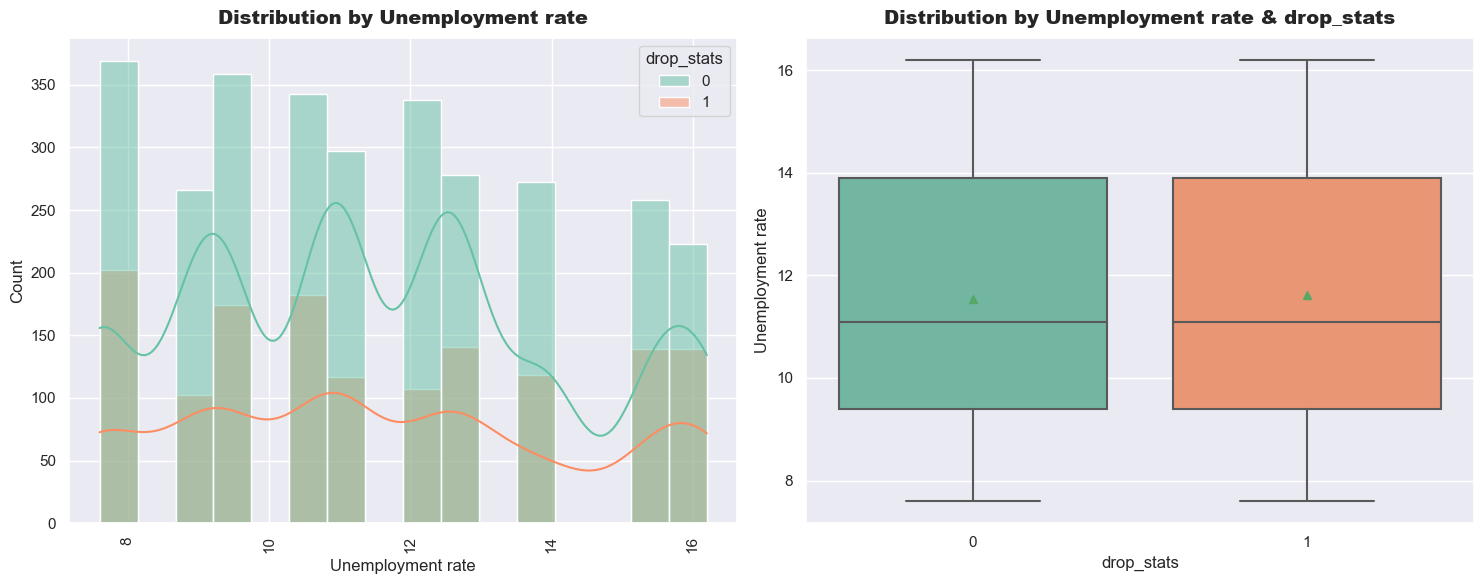

In [129]:
hist_with_hue(sub_df, 'Unemployment rate', 'drop_stats')

#### Overall Insights

The median unemployment rate and the mean unemployment rate for both classes, dropouts and non dropouts are similar.
Now, a point biserial test will be carried out to see if there is a correlation between these groups.

- Null Hypothesis (H₀): There is no correlation between the unemployment rate (socio-economic status) and the likelihood of students dropping out.
- Alternative Hypothesis (H₁): There is a correlation between the unemployment rate (socio-economic status) and the likelihood of students dropping out.
- Significance Level (α): 0.05

Note: If the p value is greater than the significance level or alpha(0.05), we fail to reject the null hypothesis and if the p value is lesser than alpha(0.05), we reject the null hypothesis.

In [130]:
biserial_correlation_test(sub_df['drop_stats'], sub_df['Unemployment rate'], 'Unemployment Rate vs Likelihood of Dropping out')

{'Test Name': 'Unemployment Rate vs Likelihood of Dropping out',
 'Hypothesis': 'H0: r = 0 vs. H1: r ≠ 0',
 'Correlation': 0.012979588012592698,
 'p-value': 0.3880793193339081,
 'Conclusion': 'Fail to reject H0'}

#### Summary:
The correlation coefficient (r) is very close to zero (0.013), indicating a negligible positive correlation between the two variables as previously seen in the plot above. The p-value of 0.388 is much higher than the significance level (α = 0.05), meaning the results are not statistically significant.


There is no evidence to suggest a significant relationship between the unemployment rate and the likelihood of dropping out. Therefore, we fail to reject the null hypothesis that the correlation is zero, implying that unemployment rate does not seem to influence student dropout rates based on this data.

#### Research Question: Does a higher Gross Domestic Product correlate with lower dropout rates among students?


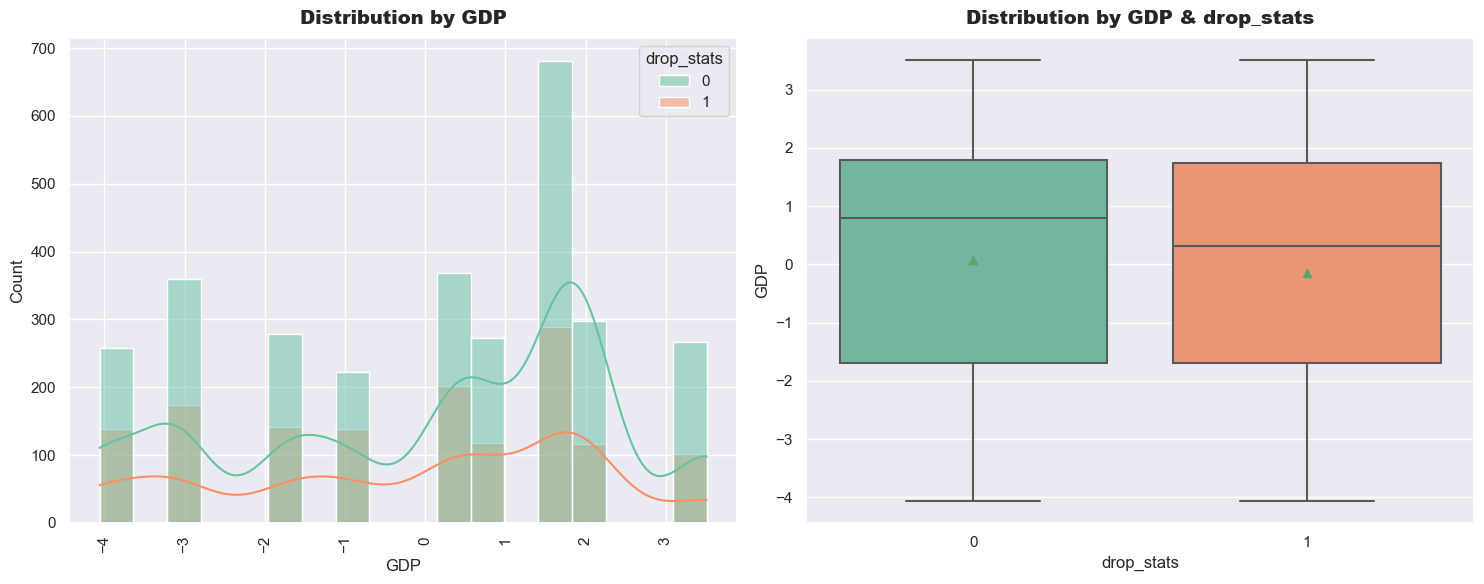

In [131]:
hist_with_hue(sub_df, 'GDP', 'drop_stats')

#### Overall Insight

The median GDP is around 0 for both groups. The variability (as measured by the interquartile range) appears to be slightly higher for students who dropped out. The box plot suggests that while the median GDP is slightly similar for both groups, the distribution of GDP levels around the median is slightly different between the two groups. It also suggests that the mean GDP of both groups are very similar.



A point biserial test will be carried out to see if the difference between these two groups are statistically significant.
- Null Hypothesis (H₀): There is no correlation between the Gross Domestic Product (GDP) and the likelihood of students dropping out.
- Alternative Hypothesis (H₁): There is a correlation between the  Gross Domestic Product (GDP) and the likelihood of students dropping out.
- Significance Level (α): 0.05


In [132]:
biserial_correlation_test(sub_df['drop_stats'], sub_df['GDP'], 'Gross Domestic Product vs Likelihood of Dropping out')

{'Test Name': 'Gross Domestic Product vs Likelihood of Dropping out',
 'Hypothesis': 'H0: r = 0 vs. H1: r ≠ 0',
 'Correlation': -0.046318667664993304,
 'p-value': 0.0020590230851910514,
 'Conclusion': 'Reject H0'}

#### Summary:
The correlation coefficient is 0.046. This indicates a very weak positive correlation between GDP and the likelihood of dropping out. Although the correlation is small, it suggests that as GDP increases, there is a slight increase in the likelihood of students dropping out. 



The p-value (0.002) is much lower than the significance level (α = 0.05), indicating that the result is statistically significant.


There is evidence to suggest a weak but statistically significant correlation between GDP and dropout rates. Based on the data, we reject the null hypothesis (H0), implying that GDP does have a small effect on the likelihood of students dropping out.

#### Research Question: Does a higher Inflation Rate correlate with lower dropout rates among students?


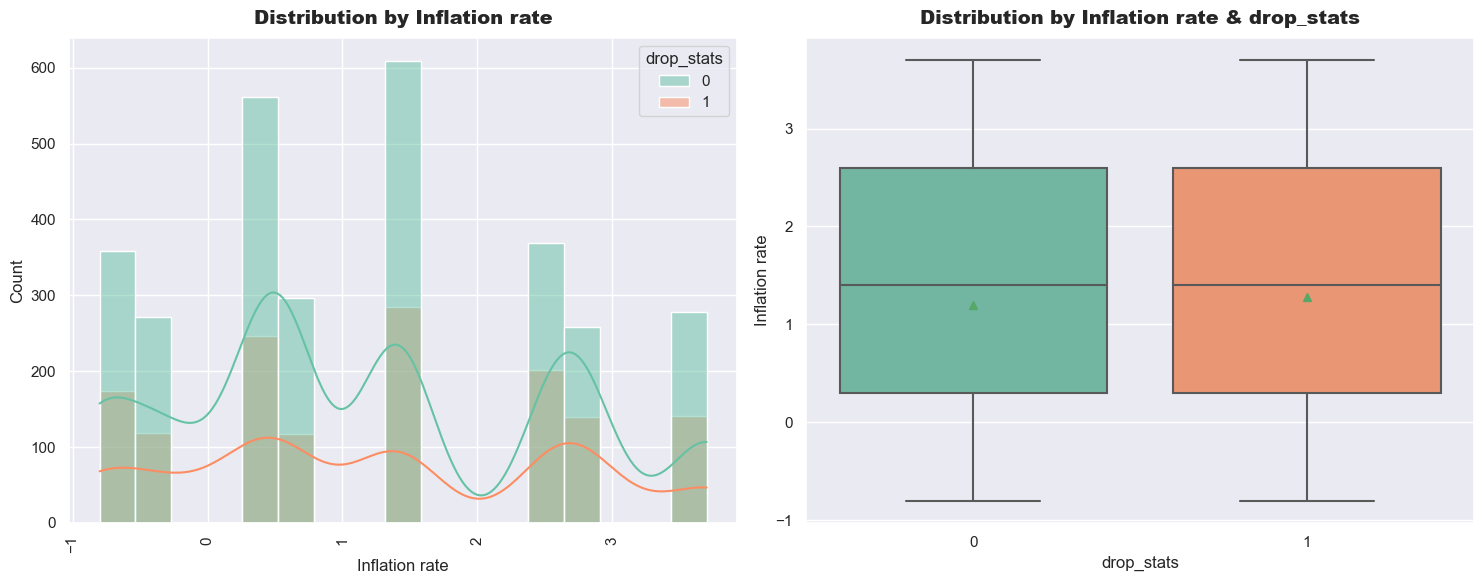

In [133]:
hist_with_hue(sub_df, 'Inflation rate', 'drop_stats')

The median Inflation rate and the mean Inflation rate for both classes, dropouts and non dropouts are similar. Now, a point biserial test will be carried out to see if there is a correlation between these groups.
- Null Hypothesis (H₀): There is no correlation between the Inflation Rate and the likelihood of students dropping out.
- Alternative Hypothesis (H₁): There is a correlation between the  Inflation Rate and the likelihood of students dropping out.
- Significance Level (α): 0.05

In [134]:
biserial_correlation_test(sub_df['drop_stats'], sub_df['Inflation rate'], 'Inflation Rate vs Likelihood of Dropping out')

{'Test Name': 'Inflation Rate vs Likelihood of Dropping out',
 'Hypothesis': 'H0: r = 0 vs. H1: r ≠ 0',
 'Correlation': 0.027826021652786824,
 'p-value': 0.06422253536081998,
 'Conclusion': 'Fail to reject H0'}

#### Summary:
The correlation coefficient (r) is very close to zero (0.023), indicating a negligible positive correlation between the two variables as seen in the plot above. The p-value of 0.123 is much higher than the significance level (α = 0.05), meaning the results are not statistically significant.

There is no evidence to suggest a significant relationship between the Inflation rate and the likelihood of dropping out. Therefore, we fail to reject the null hypothesis that the correlation is zero, implying that inflation rate does not seem to influence student dropout rates based on this data

#### Research Question: Does a higher Debt Rate correlate with lower dropout rates among students?

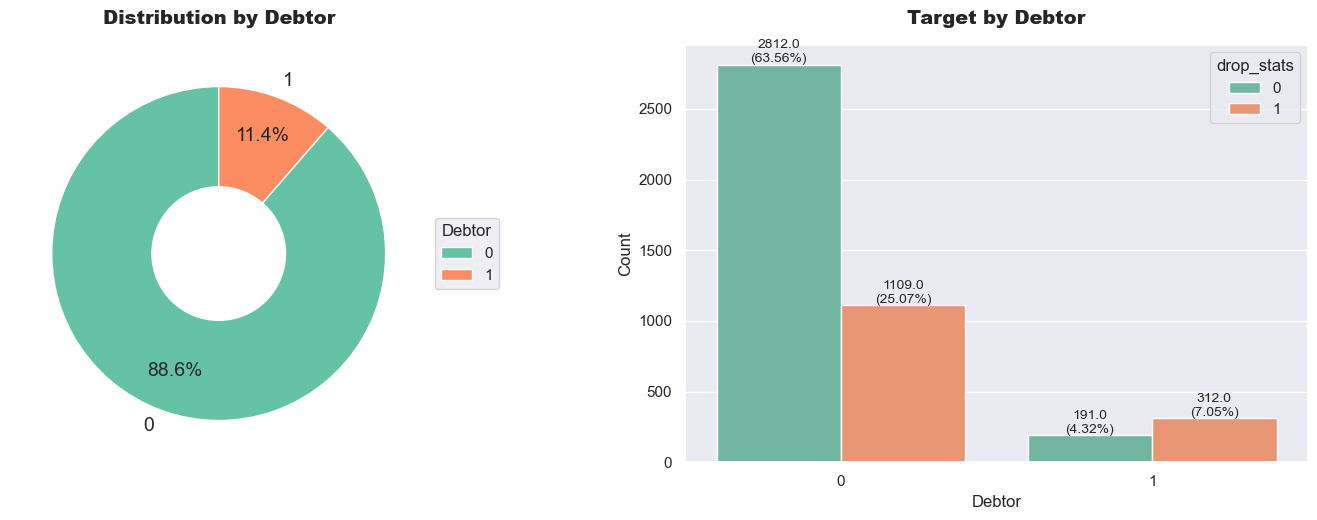

In [135]:
pie_bar_plot(sub_df, 'Debtor', 'drop_stats')

#### Overall Insights.
Among non-debtors (Debtor = 0), 63.56% of the individuals did not drop out, and 25.07% dropped out.
Among debtors (Debtor = 1), 4.32% did not drop out, while 7.05% dropped out.
This indicates a higher dropout rate for debtors compared to non-debtors, even though debtors make up a smaller portion of the dataset.

With the use of the chisquare test, we will see if this difference is statistically significant.

- Null Hypothesis (H₀): Dropout status and debt status are independent (i.e., debt status has no effect on whether a student drops out).


- Alternative Hypothesis (H₁): Dropout status and debt status are not independent (i.e., there is an association between debt status and dropout rates).


- Significance Level (α): 0.05



In [136]:
def chi2_contingency_test(sample1, sample2, test_name="Chi-Square Contingency Test", alpha=0.05):
    """
    Perform a Chi-Square contingency test and store the results in a list for tabulation.
    
    Parameters:
    - contingency_table: a 2D list or numpy array representing the contingency table (observed frequencies)
    - test_name: string, a name or label for the current test
    - alpha: float, the significance level (default = 0.05)
    
    Returns:
    - None, but appends the results to the global chi2_contingency_results list
    """
    
    contingency_table = pd.crosstab(sample1, sample2, margins = True)
    # Conduct the Chi-Square contingency test using scipy
    chi_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table, correction = False)
    
    # Hypothesis for the test
    hypothesis = 'H0: The variables are independent vs. H1: The variables are not independent'
    
    # Determine the conclusion based on the p-value
    conclusion = "Reject H0" if p_value < alpha else "Fail to reject H0"
    
    if p_value < alpha:
     
        
        first = contingency_table.values[0]
        second = contingency_table.values[1]
        total = contingency_table.values[2]
        ad = first[0] * second[1]
        bc = first[1] * second[0]
        ab_sum = first[2]
        cd_sum = second[2]
        ac_sum = total[0]
        bd_sum = total[1]
        numerator = ad-bc
        denom = ab_sum * cd_sum * ac_sum * bd_sum
        coeff = numerator/np.sqrt(denom)
    else:
        coeff = 0
     
    return {
        "Test Name": test_name,
        "Hypothesis": hypothesis,
        "Chi-Square Statistic": chi_stat,
        "Degrees of Freedom": dof,
        "p-value": p_value,
        "Conclusion": conclusion,
        "Phi's Coefficient": round(coeff, 5)
    }


In [137]:
chi2_contingency_test(sub_df['Debtor'], sub_df['drop_stats'],
                      test_name="Chi-Square Contingency Test of Debt status and Dropout status", alpha=0.05)

{'Test Name': 'Chi-Square Contingency Test of Debt status and Dropout status',
 'Hypothesis': 'H0: The variables are independent vs. H1: The variables are not independent',
 'Chi-Square Statistic': 232.825009318936,
 'Degrees of Freedom': 4,
 'p-value': 3.253913130581391e-49,
 'Conclusion': 'Reject H0',
 "Phi's Coefficient": 0.22941}

Given that the p-value is significantly smaller than the typical alpha level of 0.05, we reject the null hypothesis. This means that there is a strong association between debt status and dropout status.
Phi's coefficient measures the strength of the association between the two variables. A value of 0.22941 indicates a moderate positive association. This means that as debt status increases, the likelihood of dropping out also tends to increase.

### Research Question: Does a higher Rate of Non Payment of Tuition fees correlate with lower dropout rates among students?

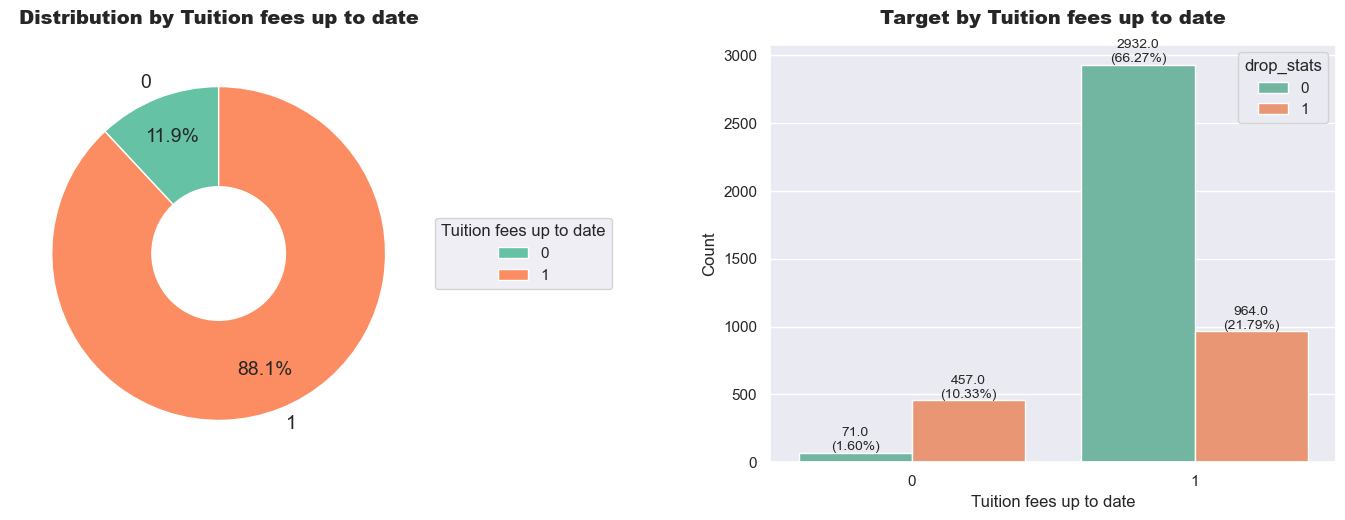

In [138]:
pie_bar_plot(sub_df, 'Tuition fees up to date', 'drop_stats')

#### Overall Insights.
88.1% of individuals have their tuition fees up to date (represented by 1). 11.9% have not paid their tuition fees (represented by 0).
This shows that the majority of individuals in the dataset have paid their tuition fees on time.

Among those who have their tuition fees up to date (Tuition fees = 1), 66.27% did not drop out, and 21.79% dropped out.
Among those who do not have their tuition fees up to date (Tuition fees = 0), 1.60% did not drop out, while 10.33% dropped out.
This suggests that individuals with unpaid tuition fees have a significantly higher dropout rate compared to those whose fees are up to date.

With the use of the chisquare test, we will see if this difference is statistically significant.

In [139]:
chi2_contingency_test(sub_df['Tuition fees up to date'], sub_df['drop_stats'],
                      test_name="Chi-Square Contingency Test of Tuition fees status and Dropout status", alpha=0.05)

{'Test Name': 'Chi-Square Contingency Test of Tuition fees status and Dropout status',
 'Hypothesis': 'H0: The variables are independent vs. H1: The variables are not independent',
 'Chi-Square Statistic': 814.7641356031282,
 'Degrees of Freedom': 4,
 'p-value': 4.867238091918708e-175,
 'Conclusion': 'Reject H0',
 "Phi's Coefficient": -0.42915}

The p-value is extremely small (4.87e-175), far below any conventional significance threshold (e.g., 0.05). This means that the probability of observing the data assuming the null hypothesis is extremely low.

Given the p-value is much smaller than 0.05, we reject the null hypothesis (H0). This implies that there is a statistically significant relationship between "Tuition fees up to date" status and "Dropout status" — the two variables are not independent.

The Phi's Coefficient of -0.42915 indicates a moderate negative association between the two variables. The negative sign suggests that individuals with up-to-date tuition fees are less likely to drop out, while those with unpaid fees are more likely to drop out.

## Hypothesis Test 2

### Question: Are Students with higher admission grades less likely to drop out?


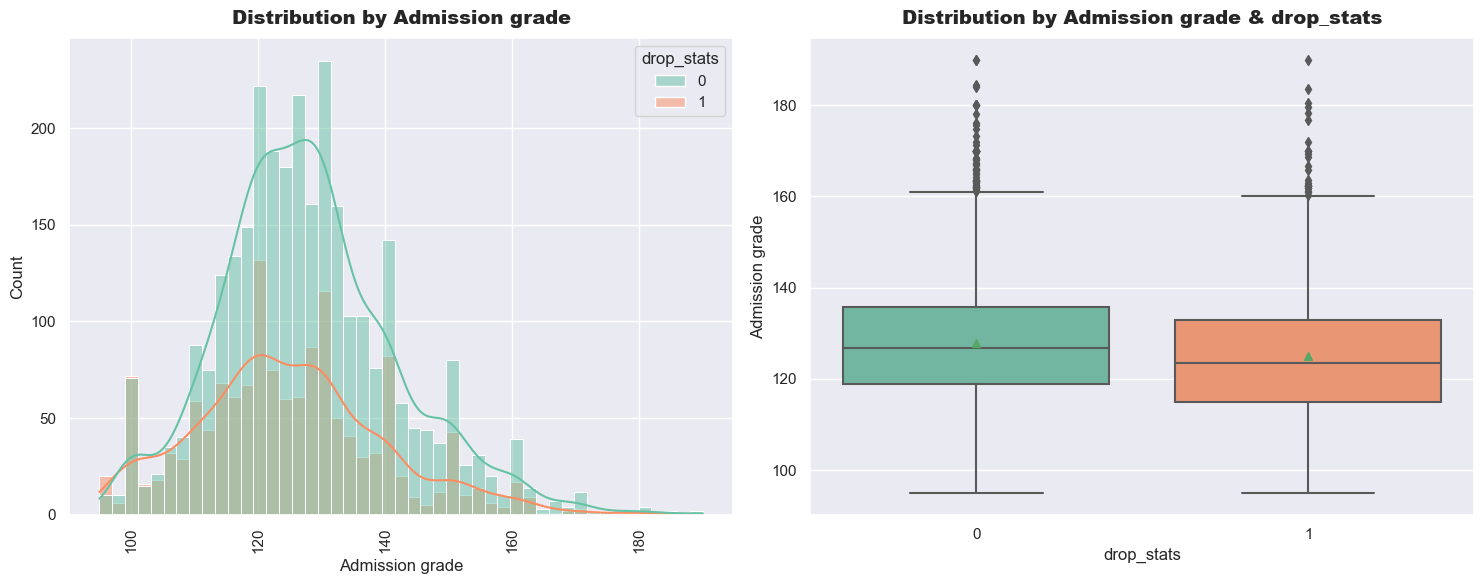

In [140]:
hist_with_hue(sub_df, 'Admission grade', 'drop_stats')

The median Admission grade is around 130 for both groups. The box plot suggests that the median and mean admission grade is slightly higher for non dropouts than dropouts. Next, we test to see if this difference between both groups is statistically significant.

- Null Hypothesis (H₀): There is no difference between the mean Admission grade of Dropouts and Non Dropouts.
- Alternative Hypothesis (H₁): The mean admission grade for Dropouts is lesser than the mean admission grade for Non dropouts.
- Significance Level (α): 0.05



To do this, a left tailed ttest will be used.

In [141]:
# Creating two columns to hold the dataframe of dropouts and non dropouts
dropouts_df = sub_df[sub_df['drop_stats'] == 1]
non_dropouts_df = sub_df[sub_df['drop_stats'] == 0]

In [142]:
def ttest_independent(sample1, sample2, test_name, alternative, alpha=0.05, equal_var = False):
    """
    Perform an independent T-test between two samples and store the results in a list for tabulation.
    
    Parameters:
    - sample1: list or numpy array, the first sample
    - sample2: list or numpy array, the second sample
    - test_name: string, a name or label for the current test
    - alpha: float, the significance level (default = 0.05)
    
    Returns:
    - None, but appends the results to the global ttest_results list
    """
    if stats.levene(sample1, sample2)[1] > alpha:
        equal_var = True
    # Conduct the independent T-test using scipy
    t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var = equal_var, alternative = alternative)
    
    # Determine the conclusion based on the p-value
    conclusion = "Reject H0" if p_value < alpha else "Fail to reject H0"
    if alternative == 'less':
        hypothesis = 'H0: μ1 = μ2 vs. H1: μ1 < μ2'
    elif alternative == 'greater':
        hypothesis = 'H0: μ1 = μ2 vs. H1: μ1 > μ2'
    else:
        hypothesis = 'H0: μ1 = μ2 vs. H1: μ1 ≠ μ2'
#     # Append the results to the global ttest_results list
#     ttest_results.append({
#         "Test Name": test_name,
#         "Hypothesis": hypothesis,
#         "T-statistic": t_stat,
#         "p-value": p_value,
#         "Conclusion": conclusion
#     })
    return {
    "Test Name": test_name,
    "Hypothesis": hypothesis,
    "T-statistic": t_stat,
    "p-value": p_value,
    "Conclusion": conclusion
}



In [143]:
ttest_independent(dropouts_df['Admission grade'], non_dropouts_df['Admission grade'], 'Admission grade for dropouts vs non dropouts',
                  alternative = 'less')

{'Test Name': 'Admission grade for dropouts vs non dropouts',
 'Hypothesis': 'H0: μ1 = μ2 vs. H1: μ1 < μ2',
 'T-statistic': -6.237124913250986,
 'p-value': 2.590728610201627e-10,
 'Conclusion': 'Reject H0'}

#### Summary


The large negative t-statistic (-6.237) suggests a strong difference between the two groups, with dropouts having significantly lower admission grades than non-dropouts.


The p-value (2.59e-10) is extremely small and well below the significance level (α = 0.05), indicating that the difference is statistically significant.


The evidence strongly supports the alternative hypothesis. We reject the null hypothesis (H0) and conclude that students who dropped out had significantly lower admission grades compared to those who did not.

## Hypothesis Test 3

### Question: Is Dropout rates lower for students receiving financial aid or scholarships?


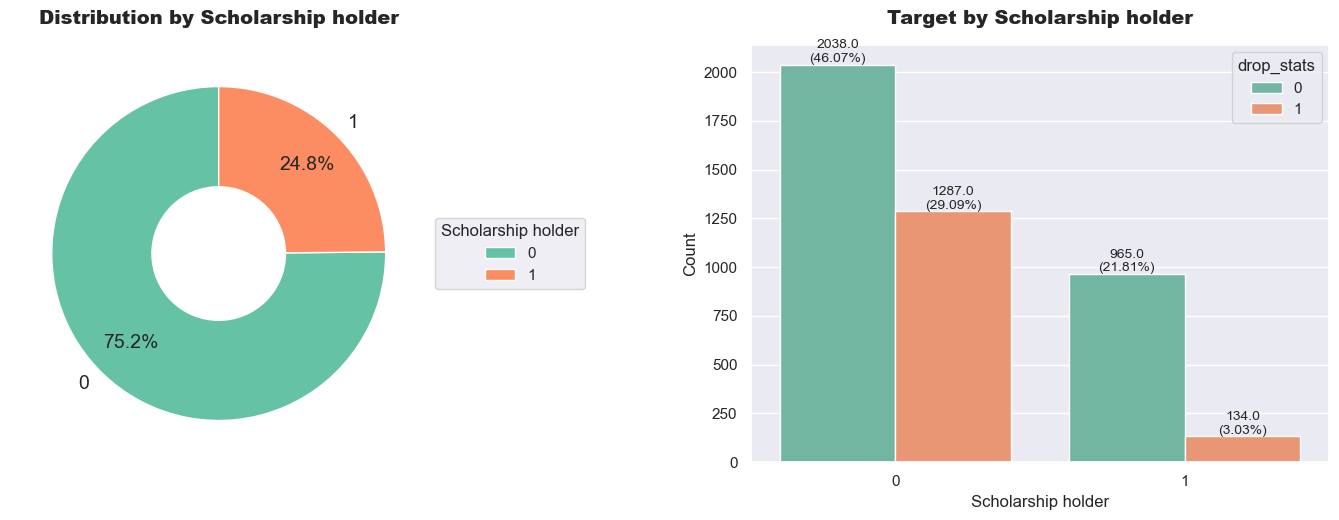

In [144]:
pie_bar_plot(sub_df, 'Scholarship holder', 'drop_stats')

#### Overall Insights.
24.8% of individuals are scholarship holders (represented by 1). 75.2% are not scholarship holders (represented by 0).
This shows that the majority of individuals in the dataset are not scholarship holders.

Among those who do not have a scholarship holders (Scholarship holder = 0), 61.30% did not drop out, and 38.70% dropped out.
Among those who have a scholarship (Scholarship holder = 1), 87.80% did not drop out, while 12.20% dropped out.
This suggests that individuals with do not scholarship have a significantly higher dropout rate compared to those who does.

With the use of the chisquare test, we will see if this difference between dropouts and non dropouts is statistically significant.

- Null Hypothesis (H₀): Dropout status and scholarship status are independent (i.e., scholarship status has no effect on whether a student drops out).


- Alternative Hypothesis (H₁): Dropout status and Scholarship status are not independent (i.e., there is an association between scholarship status and dropout rates).


- Significance Level (α): 0.05



In [145]:
chi2_contingency_test(sub_df['Scholarship holder'], sub_df['drop_stats'], test_name="Test of Association between Scholarship status and dropout rate", alpha=0.05)

{'Test Name': 'Test of Association between Scholarship status and dropout rate',
 'Hypothesis': 'H0: The variables are independent vs. H1: The variables are not independent',
 'Chi-Square Statistic': 266.318360107245,
 'Degrees of Freedom': 4,
 'p-value': 1.9830025983214852e-56,
 'Conclusion': 'Reject H0',
 "Phi's Coefficient": -0.24535}

#### Summary:

The extremely small p-value (1.983E-56 is far below the significance level (α = 0.05), indicating a highly significant result.


Phi's coefficient is a measure of association strength for Chi-square tests. A value of -0.24535 suggests a moderate negative association between the two variables (e.g., as scholarship rate increases, the likelihood of dropout may decrease). This corroborates what we discovered in the plot above.

### Question: Is there an Association between the Dropout Rate and International Status?

Null Hypothesis (H₀): Dropout status and International status are independent (i.e., Internatinal status has no effect on whether a student drops out).

Alternative Hypothesis (H₁): Dropout status and International status are not independent (i.e., there is an association between International status and dropout rates).

Significance Level (α): 0.05

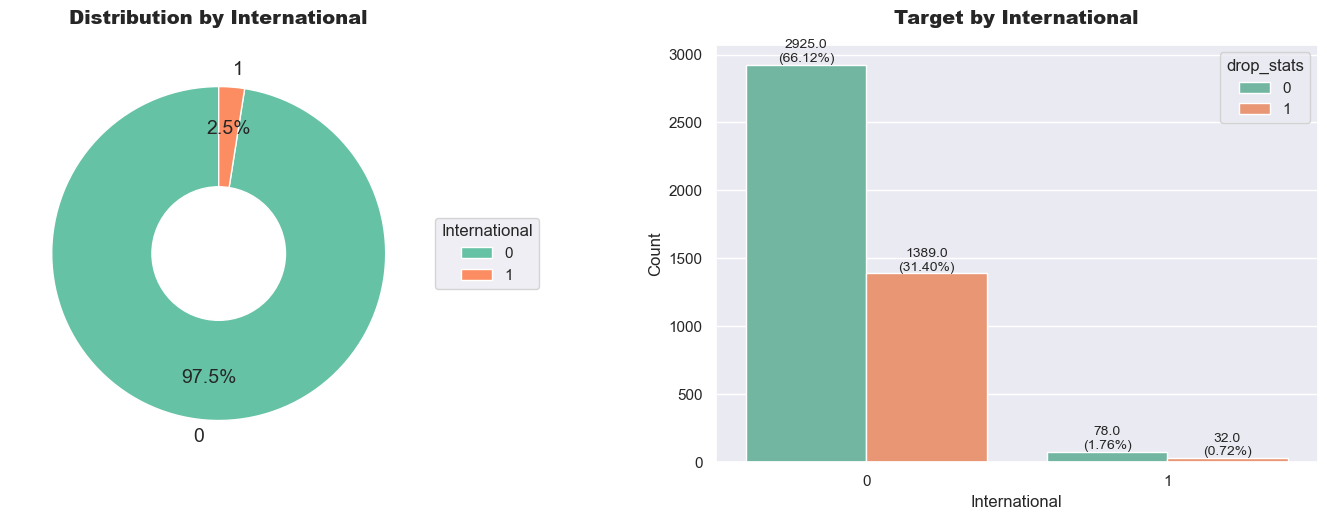

In [146]:
pie_bar_plot(sub_df, 'International', 'drop_stats')

In [147]:
chi2_contingency_test(sub_df['International'], sub_df['drop_stats'], test_name="Test of Association between International status and dropout rate", alpha=0.05)

{'Test Name': 'Test of Association between International status and dropout rate',
 'Hypothesis': 'H0: The variables are independent vs. H1: The variables are not independent',
 'Chi-Square Statistic': 0.4747945180503468,
 'Degrees of Freedom': 4,
 'p-value': 0.975907891953395,
 'Conclusion': 'Fail to reject H0',
 "Phi's Coefficient": 0}

#### Key Insights

- Null Hypothesis (H0): The variables are independent (no association).
- Chi-Square Statistic: 0.475.
- Degrees of Freedom: 4.
- p-value: 0.976.
- Conclusion: There is no significant association between the variables (fail to reject H0).
- Phi's Coefficient: -0.01036, indicating a very weak or no association.
This test concludes that International status does not significantly affect the dropout rate.

### Question: Is there an Association between the Dropout Rate and Educational Special needs?

Null Hypothesis (H₀): Dropout status and Educational special needs are independent (i.e., Educational Special needs has no effect on whether a student drops out).

Alternative Hypothesis (H₁): Dropout status and Educational special needs are not independent (i.e., there is an association between Educational special needs and dropout rates).

Significance Level (α): 0.05

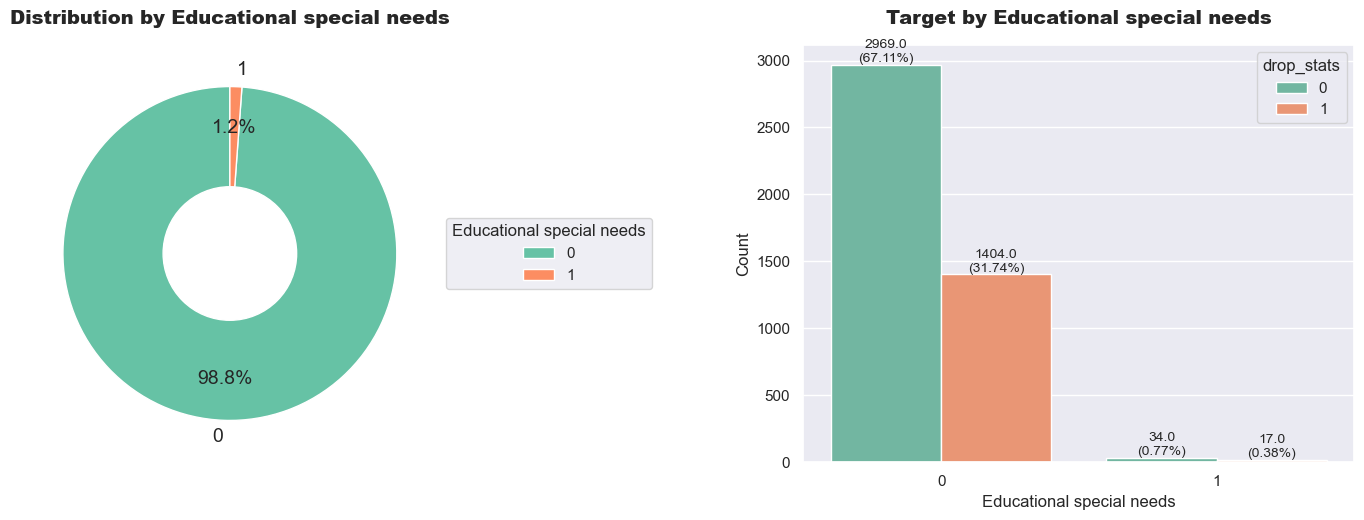

In [148]:
pie_bar_plot(sub_df, 'Educational special needs', 'drop_stats')

In [149]:
chi2_contingency_test(sub_df['Educational special needs'], sub_df['drop_stats'], test_name="Test of Association between Special needs and dropout rate", alpha=0.05)

{'Test Name': 'Test of Association between Special needs and dropout rate',
 'Hypothesis': 'H0: The variables are independent vs. H1: The variables are not independent',
 'Chi-Square Statistic': 0.03482295723872167,
 'Degrees of Freedom': 4,
 'p-value': 0.9998501682566343,
 'Conclusion': 'Fail to reject H0',
 "Phi's Coefficient": 0}

#### Key Insights

- Test: Association between Special needs and dropout rate.
- Null Hypothesis (H0): The variables are independent (no association).
- Chi-Square Statistic: 0.035.
- Degrees of Freedom: 4.
- p-value: 0.9999.
- Conclusion: There is no significant association between Special needs and dropout rate (fail to reject H0).
- Phi's Coefficient: 0.00281, indicating an extremely weak or no association.

This test concludes that there is no meaningful relationship between Special needs and the dropout rate.

### Question: Are Students with Average curricular units less likely to drop out?
- Null Hypothesis (H₀): There is no difference between the mean Admission grade of Dropouts and Non Dropouts.
- Alternative Hypothesis (H₁): The mean admission grade for Dropouts is lesser than the mean admission grade for Non dropouts.
- Significance Level (α): 0.05
To do this, a left tailed ttest will be used.

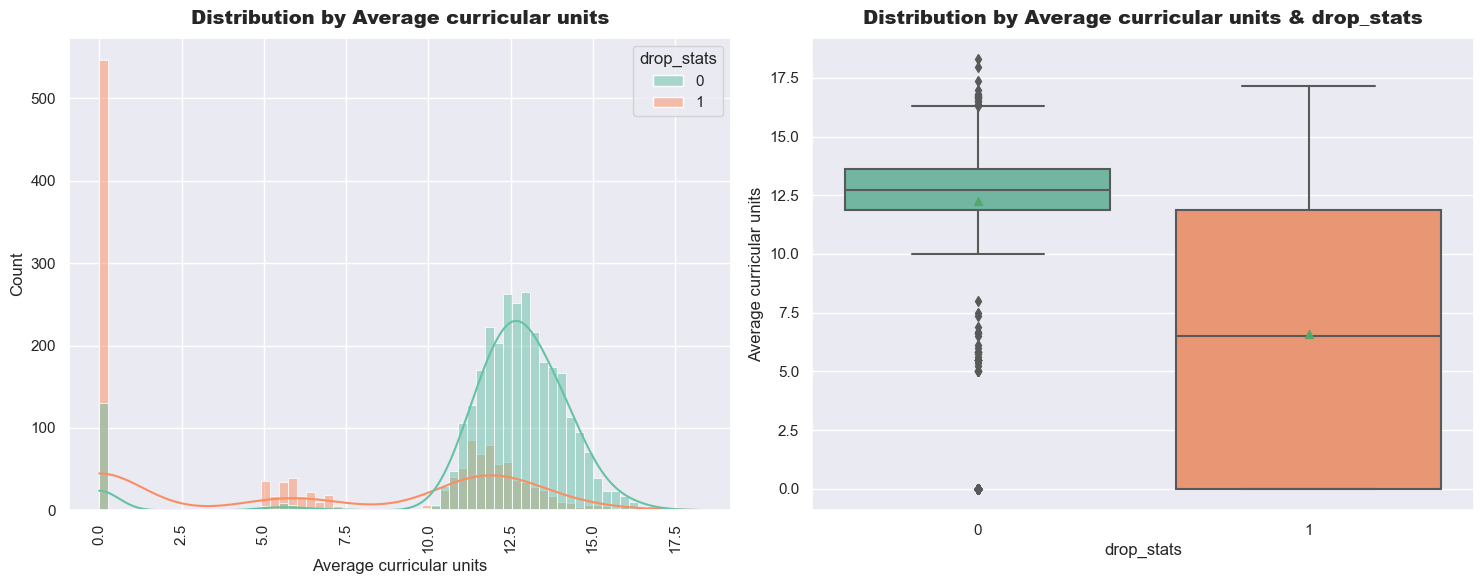

In [150]:
hist_with_hue(sub_df, 'Average curricular units', 'drop_stats')

In [151]:
ttest_independent(dropouts_df['Average curricular units'], non_dropouts_df['Previous qualification (grade)'], 'Previous grade for dropouts vs non dropouts',
                  alternative = 'less')

{'Test Name': 'Previous grade for dropouts vs non dropouts',
 'Hypothesis': 'H0: μ1 = μ2 vs. H1: μ1 < μ2',
 'T-statistic': -444.6317075988847,
 'p-value': 0.0,
 'Conclusion': 'Reject H0'}

Key Insights

The null hypothesis, which posited that the mean grades of dropouts (μ1) and non-dropouts (μ2) are equal, was tested against the alternative hypothesis that the mean grade of dropouts is lower. With a T-statistic of -444.63 and a p-value of 0.0, the evidence overwhelmingly supports rejecting the null hypothesis. This indicates that the mean previous grade of dropouts is significantly lower than that of non-dropouts, reinforcing the idea that lower grades are strongly associated with a higher likelihood of dropping out.

In [152]:
# Testing the impact of the 'Admission grade', 'GDP', 'Unemployment rate', 'Inflation rate', and the 'Scholarship holder' 
# variables in predicting the likelihood of dropping out
data = sub_df[['Admission grade', 'GDP', 'Unemployment rate', 'Inflation rate', 'Scholarship holder']]
X = sm.add_constant(data)
y = sub_df['drop_stats']

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# Interpret p-values for each predictor variable
for var in data.columns[0:]:  # Skip the constant (intercept)
    if result.pvalues[var] < 0.05:
        print(f"{var} Conclusion------Reject H0: {var} significantly impacts dropout rates.")
    else:
        print(f"{var} Conclusion------Fail to reject H0: No significant evidence that {var} impacts dropout rates.")


Optimization terminated successfully.
         Current function value: 0.588230
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             drop_stats   No. Observations:                 4424
Model:                          Logit   Df Residuals:                     4418
Method:                           MLE   Df Model:                            5
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                 0.06299
Time:                        20:11:13   Log-Likelihood:                -2602.3
converged:                       True   LL-Null:                       -2777.3
Covariance Type:            nonrobust   LLR p-value:                 1.861e-73
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1509      0.333      3.460      0.001       0.499       1.803
Admis

# Multivariate Analysis

In [153]:
# sns.pairplot(sub_df[['Admission grade', 'Curricular units 1st sem (credited)',
#                     'Curricular units 1st sem (enrolled)',
#                     'Curricular units 1st sem (grade)',
#                     'Curricular units 2nd sem (credited)',
#                     'Curricular units 2nd sem (grade)',
#                      'Unemployment rate',
#                     'Inflation rate', 'GDP', 'Target']], hue='Target', palette = colors)

In [154]:
# Categorizing the ages of patients into age groups such as young middle aged and senior.
bins = [15, 25, 35, 45,  60, np.inf]
labels = ['young-adult', 'adult', 'middle aged', 'advanced', 'senior']
sub_df['age_group'] = pd.cut(sub_df['Age at enrollment'], bins, labels = labels)

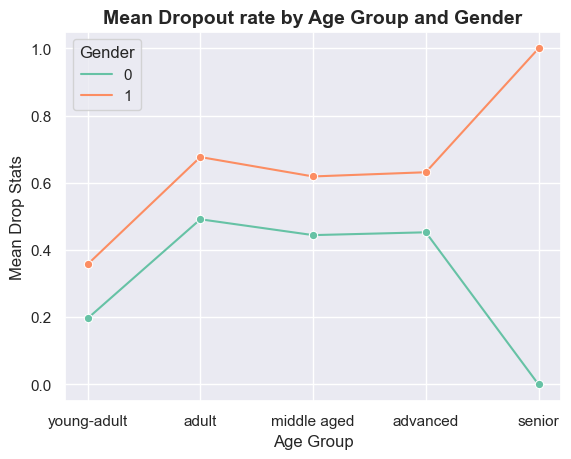

In [155]:
#Visualizing the average dropout rate by Age group and gender
sns.lineplot(data = sub_df, x = 'age_group', y = 'drop_stats', hue = 'Gender', ci = None, palette = colors, marker = 'o')
plt.title('Mean Dropout rate by Age Group and Gender', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Mean Drop Stats', fontsize=12)
plt.show()

#### Insights
- There is a general trend where the mean drop status increases with age. This could indicate that older individuals are more likely to experience "drop" events compared to younger individuals.

- While there are some variations, the overall trend of increasing drop status with age seems to hold true for both genders. However, there might be slight differences in the magnitude of the increase between genders. For the 'Female' (0) gender, the dropout rate decreases as the age group increases from 'advanced' to 'senior'. This trend is not there for the male gender.

The 'adult' age group i.e ages (25-35) have the highest dropout rate for both genders.

# Principal Components Visualization

For visualization of the principal components, the biplot visualization will be used.
A biplot is a type of plot that displays both the scores of observations (data points) and the loadings (contributions) of variables in a reduced-dimensional space, typically after performing Principal Component Analysis (PCA). It combines two types of information in a single graph:

1. Scores: These represent the observations (samples) projected onto the principal components, showing their relationship in the reduced dimensions.
2. Loadings: These are the directions and magnitudes of the original variables, visualized as vectors or arrows that indicate how much each variable contributes to the principal components.

### Uses in Data Analysis:
- Dimensionality Reduction: A biplot helps visualize high-dimensional data in 2D or 3D by projecting it onto the principal components, making complex relationships easier to interpret.
- Feature Contribution: The arrows (or vectors) of the original features in a biplot show how each variable influences the principal components, helping identify the most important features.
- Grouping Patterns: The spatial distribution of points can reveal clusters, trends, or outliers in the data. For instance, data points close to each other in the biplot suggest similarity.
- Correlation Analysis: Variables with similar directions in the biplot indicate positive correlations, while those pointing in opposite directions are negatively correlated.

In summary, a biplot provides insights into both the structure of the dataset and the contributions of variables, making it a useful tool for exploratory data analysis and feature selection.

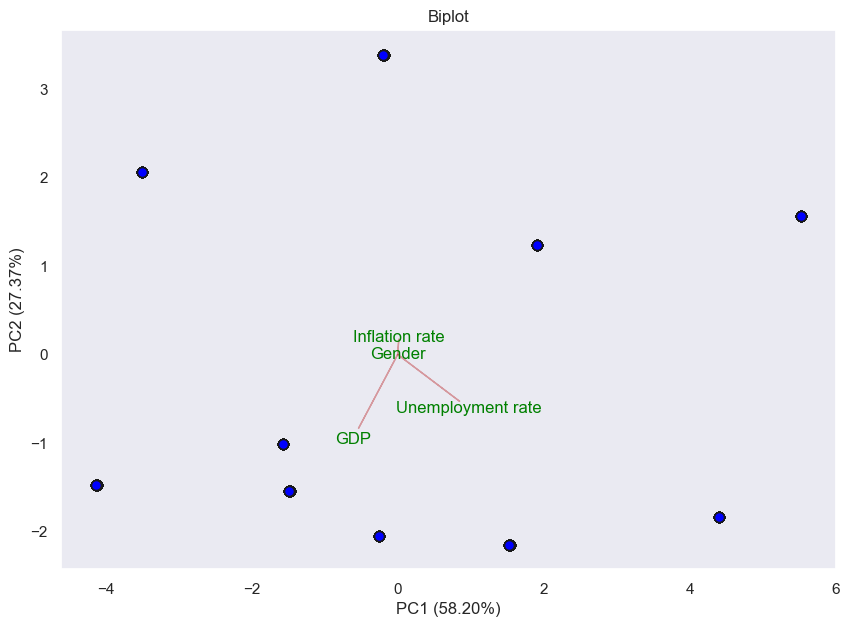

In [156]:
def biplot(data, labels=None):
    # Perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 7))

    # Plot the data points (scores)
    ax.scatter(principal_components[:, 0], principal_components[:, 1], c='blue', edgecolor='k', s=50)

    for i, (component1, component2) in enumerate(zip(pca.components_[0], pca.components_[1])):
        plt.arrow(0, 0, component1, component2, color='r', alpha=0.5)
        if labels is not None:
            plt.text(component1 * 1.15, component2 * 1.15, labels[i], color='green', ha='center', va='center')

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
    ax.set_title('Biplot')

    plt.grid()
    plt.show()

# Example data
temp_df = sub_df[['Unemployment rate',
                    'Inflation rate', 'GDP', 'Gender']]

# Call the biplot function
biplot(temp_df, temp_df.columns)


Key Insights

- A few number of variables were selected for the biplot because too much features will lead to congestion of the plot. The features selected are the 'Unemployment rate', 'Inflation rate', 'GDP' and the 'Gender' column.
- These points are plotted according to the values of the first and second principal components (PC1 and PC2).
- PC1 explains 56.01% of the variance in the data, while PC2 explains 26.36%. Together, they capture around 82% of the variance, making this a good representation of the data.
- The red arrows represent the loading vectors, which show how the original variables contribute to the principal components.
- The direction and length of the arrows indicate the correlation between the variables and the principal components:
  - Longer arrows indicate variables that contribute more to that principal component.
  - Shorter arrows indicate variables that contribute less.
- In this case, the variables are labeled as 'Inflation rate', 'Application order', 'GDP', 'Unemployment rate', etc.

- Application order, Inflation rate, and Unemployment rate contribute more to Principal component 1 (along the x-axis) because their vectors are more aligned with this component.
- GDP contributes to both PC1 and PC2 but is more aligned with PC2 (y-axis).
- Variables like Application order and Inflation rate are clustered together, which indicates that these variables may be positively correlated with each other.
- GDP has a lower influence compared to other variables based on its shorter arrow.


In [157]:
# import plotly.express as px
# fig = px.parallel_coordinates(sub_df, color="Target",
#                               dimensions=['Admission grade', 'Curricular units 1st sem (credited)',
#                     'Curricular units 2nd sem (credited)',
#                      'Unemployment rate',
#                     'Inflation rate', 'GDP'],
#                               color_continuous_scale=px.colors.diverging.Tealrose,
#                               color_continuous_midpoint=2)
# fig.update_layout(
#     autosize=False,
#     width=1000,
#     height=1000
#     )
# fig.show()


This parallel coordinates plot provides a rich view into the relationships between student performance and various academic and economic factors. It appears that students with higher admission grades tend to follow a more predictable and stable pattern across the board. Their performance is more consistent, with many of them successfully completing a higher number of curricular units in both the first and second semesters. This could suggest that students who enter with stronger academic credentials are more likely to stay on track academically.

On the other hand, we see that when the unemployment rate is high, students’ paths tend to scatter more. This might imply that during tough economic times, students face more challenges, possibly due to financial pressures, which could lead to more varied academic outcomes, including the likelihood of dropping out. Similarly, while inflation doesn’t have as direct of an impact, periods of higher inflation also show a broader spread of paths, hinting at economic stress potentially affecting students’ ability to perform or remain in school.

As we move across the variables, the GDP seems to represent a more stable influence. In times of higher GDP, students’ performance appears to stabilize, whereas lower GDP seems to correlate with a broader range of outcomes. This could indicate that when the economy is doing well, students are better able to focus on their studies without external financial worries.

Finally, looking at the overall picture, there’s a clear pattern that students who perform better or are less likely to drop out follow more consistent paths, particularly in terms of academic performance and external economic conditions. Conversely, those at risk of dropping out show a lot more variation in how they navigate through both academic and economic hurdles.

# Feature Transformation




For this section, new features in the dataset will be created and skewed numerical features will be transformed. Three custom scikit learn transformers will be created to aid in feature engineering.

 - Feature Binner: The Feature Binner class is a custom scikit learn transformer designed for preprocessing features in a machine learning pipeline. Specifically, it focuses on binning numerical features, which is a common technique used to convert continuous variables into categorical ones. This transformation can enhance the model's performance by capturing non-linear relationships and simplifying the data.
For binning the data, the Fisher's Jenks algorithm was used. The Fisher-Jenks optimization is a method used to determine optimal class intervals for continuous data. It is particularly relevant in because it helps in 

    - Minimize within-class variance: Fisher-Jenks optimization seeks to minimize the variance within each class while maximizing the variance between classes. This ensures that data points within the same class are as similar as possible, while different classes are significantly different.

    - Data-Based Classification: The Fisher Jenks algorithm provides a systematic way of classifying continuous data into meaningful categories, rather than relying on arbitrary grouping methods. You can create adaptive class definitions based on data distribution.

    - Resistant to Outliers: The algorithm is robust to outliers and can provide stable class definitions, which is important in many real-world applications where data distributions may be skewed or noisy.


- FeatureTransformer: The FeatureTransformer class is a custom transformer designed to enhance a dataset by creating new features derived from existing ones. It is built to integrate seamlessly with the Scikit-learn's pipeline.

- Polynomial-Interaction-Features: The PolynomialFeaturesInteraction class is a custom transformer designed to enhance a dataset by generating polynomial and interaction features. By applying polynomial transformations specifically to a selected set of numerical features, this transformer allows machine learning models to capture more complex relationships within the data, potentially improving their predictive performance. The transformer is built to integrate seamlessly with Scikit-learn's pipeline.
- LogTransformer: The LogTransformer class is a custom transformer designed to enhance a dataset by applying logarithmic transformation to certain skewed columns in the dataset.

After this the three transformers will be combined in a scikit learn pipeline to transform the dataset. The transformers was created to improve code reusability, and scalibility


In [158]:
# sub_df['Total Units Enrolled'] = sub_df['Curricular units 1st sem (enrolled)'] + sub_df['Curricular units 2nd sem (enrolled)']
# sub_df['Total Units Approved'] = sub_df['Curricular units 1st sem (approved)'] + sub_df['Curricular units 2nd sem (approved)']
# sub_df['Approval Rate'] = sub_df['Total Units Approved'] / sub_df['Total Units Enrolled']
# sub_df['Improvement in Grades'] = sub_df['Curricular units 2nd sem (grade)'] - sub_df['Curricular units 1st sem (grade)']
# sub_df['Economic Hardship'] = sub_df['Unemployment rate'] + sub_df['Inflation rate'] - sub_df['GDP']
# sub_df['Total Units without Evaluations'] = sub_df['Curricular units 1st sem (without evaluations)'] + sub_df['Curricular units 2nd sem (without evaluations)']

To engineer new features, we now revert back to our original dataset 'df' that contain our original variables and values. Another copy of the original dataset will be created which will contain the newly engineered features.

In [159]:
# Creating another copy of the dataset to prevent editing the main data.
data = df.copy()

In [160]:
# columns_to_convert = [
#     'Marital status', 'Daytime/evening attendance','Application order', 'Nationality', 'Course', 'Application mode', 
#     'Previous qualification', "Mother's qualification", "Father's qualification", 
#     "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date',
#     'Gender', 'Scholarship holder', 'International'
# ]

# data = convert_to_categorical(data, columns_to_convert)

Applying the Fisher jenks algorithm to determine the optimum number of bins in the dataset. To find the optimum number of bins, the GVF (goodness of variance fit) threshold is used. 
GVF provides a numerical value that indicates how well the classes separate the data. A higher GVF suggests that the classes effectively differentiate the data points, while a lower GVF indicates poor separation. For the binning, the threshold used is 0.5, this value was chosen to optimize class separation and reduce the creation of excess number of classes. 

In [161]:
# Function to find optimal number of classes using GVF threshold
def find_optimal_classes(data, max_classes=10, gvf_threshold=0.5):
    best_gvf = 0.0  # Initialize the best GVF to 0
    best_classes = 0
    best_bins = None

    total_variance = np.var(data)  # Calculate total variance of the data

    for k in range(2, max_classes + 1):
        # Apply Fisher-Jenks for k classes
        breaks = jenkspy.jenks_breaks(data, n_classes=k)
        
        # Classify the data based on the breaks
        classified = np.digitize(data, breaks, right=True)

        # Calculate within-class variance (sum of variances within each class)
        within_class_variance = sum(np.var(data[classified == i]) for i in range(1, k + 1))

        # Calculate GVF (Goodness of Variance Fit)
        gvf = (total_variance - within_class_variance) / total_variance

        print(f"Number of classes: {k}, GVF: {gvf:.4f}")

        if gvf >= gvf_threshold:
            best_gvf = gvf
            best_classes = k
            best_bins = breaks
            break  # Stop the loop once the threshold is reached

    return best_classes, best_bins, best_gvf



In [162]:
for cols in ['Age at enrollment', 'Admission grade', 'Previous qualification (grade)']:
    print('\n', cols, '\n')
    print('-'* 50)
    print(find_optimal_classes(data[cols]))


 Age at enrollment 

--------------------------------------------------
Number of classes: 2, GVF: 0.0296
Number of classes: 3, GVF: 0.1737
Number of classes: 4, GVF: 0.3247
Number of classes: 5, GVF: 0.4075
Number of classes: 6, GVF: 0.4394
Number of classes: 7, GVF: 0.4685
Number of classes: 8, GVF: 0.5086
(8, [17, 19, 22, 26, 30, 35, 41, 49, 70], 0.5085746709180515)

 Admission grade 

--------------------------------------------------
Number of classes: 2, GVF: 0.1706
Number of classes: 3, GVF: 0.2842
Number of classes: 4, GVF: 0.3790
Number of classes: 5, GVF: 0.4533
Number of classes: 6, GVF: 0.4712
Number of classes: 7, GVF: 0.5340
(7, [95.0, 107.2, 116.9, 125.2, 134.1, 144.6, 157.7, 190.0], 0.5339775510607233)

 Previous qualification (grade) 

--------------------------------------------------
Number of classes: 2, GVF: 0.1094
Number of classes: 3, GVF: 0.2103
Number of classes: 4, GVF: 0.2869
Number of classes: 5, GVF: 0.3661
Number of classes: 6, GVF: 0.4408
Number of class

In [163]:
class FeatureBinner(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Initialize the bins and labels
        self.age_bins = [16, 19, 22, 26, 30, 35, 41, 49, 71]
        self.ad_grade_bins = [94.0, 107.2, 116.9, 125.2, 134.1, 144.6, 157.7, 191.0]
        self.prev_grade_bins = [94.0, 112.0, 122.0, 129.0, 136.0, 144.0, 154.0, 166.0, 191.0]
        self.labels_ad = [0, 1, 2, 3, 4, 5, 6]
        self.labels_prev = [0, 1, 2, 3, 4, 5, 6, 7]
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        
        # Apply the binning using pd.cut and label encoding them manually
        X['age_bins'] = pd.cut(X['Age at enrollment'], bins=self.age_bins, labels=self.labels_prev).astype('int')
        
        X['Admission grade (bins)'] = pd.cut(X['Admission grade'], bins=self.ad_grade_bins, labels=self.labels_ad).astype('int')
        
        X['Previous grade (bins)'] = pd.cut(X['Previous qualification (grade)'], bins=self.prev_grade_bins, labels=self.labels_prev).astype('int')
        return X

        

In [164]:
class FeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X):
        X = X.copy()
        
        # Total Units Enrolled
        X['Total Units Enrolled'] = X['Curricular units 1st sem (enrolled)'] + X['Curricular units 2nd sem (enrolled)']
        
        # Total Units Approved
        X['Total Units Approved'] = X['Curricular units 1st sem (approved)'] + X['Curricular units 2nd sem (approved)']
        
        # Average curricular units
        X['Average curricular units'] = (X['Curricular units 1st sem (grade)'] + X['Curricular units 2nd sem (grade)']) / 2
        
        # Approval Rate (Handle division by zero to remove NaN errors)
        X['Approval Rate'] = np.where(X['Total Units Enrolled'] != 0,
                                      X['Total Units Approved'] / X['Total Units Enrolled'],
                                      0)
        
        # Improvement in Grades
        X['Improvement in Grades'] = X['Curricular units 2nd sem (grade)'] - X['Curricular units 1st sem (grade)']
        
        # Economic Hardship
        X['Economic Hardship'] = X['Unemployment rate'] + X['Inflation rate'] - X['GDP']
        
        # Total Units without Evaluations
        X['Total Units without Evaluations'] = X['Curricular units 1st sem (without evaluations)'] + X['Curricular units 2nd sem (without evaluations)']
      
        return X


In [165]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        # Initialize instance variables
        self.columns = None  # Will store the names of columns to transform
        self.new_cols = []  # List to keep track of columns selected for log transformation
        pass

    def fit(self, X, y=None):
        # Make a copy of the input DataFrame to avoid modifying the original data
        X = X.copy()
        
        # Identify columns to consider for log transformation by excluding specified categorical columns
        self.columns = X.drop(['Marital status', 'Daytime/evening attendance', 'Application order', 'Nationality', 'Course', 
                               'Application mode', 'Previous qualification', "Mother's qualification", 
                               "Father's qualification", "Mother's occupation", "Father's occupation", 
                               'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 
                               'Gender', 'Scholarship holder', 'International', 'age_bins', 
                               'Admission grade (bins)', 'Previous grade (bins)', 'Target'], axis=1).columns
        
        # Loop through specified columns to assess skewness
        for col in self.columns:
            # Calculate skewness, ignoring NaN values
            col_skewness = stats.skew(X[col].dropna())  

            # Check if skewness is above the threshold and ensure values are non-negative
            if (col_skewness > 1 or col_skewness < -1) and (X[col] >= 0).all():
                self.new_cols.append(col)  # Store column names for transformation
        return self

    def transform(self, X):
        # Create a copy of the input DataFrame
        X = X.copy()

        # Loop through the columns identified for log transformation
        for col in self.new_cols:
            X[col] = np.log1p(X[col])  # Apply log transformation to the selected columns
            
        return X  # Return the transformed DataFrame


In [166]:
class PolynomialFeaturesInteraction(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Initialize the PolynomialFeatures transformer from sklearn
        self.poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
        
    def fit(self, X, y=None):
        # Select numerical features to apply polynomial transformation
        self.numerical_features = ['Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)',
                                'Curricular units 1st sem (enrolled)',
                                'Curricular units 1st sem (evaluations)',
                                'Curricular units 1st sem (approved)',
                                'Curricular units 1st sem (without evaluations)',
                                'Curricular units 2nd sem (credited)',
                                'Curricular units 2nd sem (enrolled)',
                                'Curricular units 2nd sem (evaluations)',
                                'Curricular units 2nd sem (approved)',
                                'Curricular units 2nd sem (without evaluations)', 'Total Units Enrolled',
                                'Total Units Approved', 'Average curricular units', 'Approval Rate', 'Improvement in Grades',
                                'Economic Hardship', 'Total Units without Evaluations', 'Unemployment rate', 'Inflation rate', 
                                'GDP']
        # Fit the polynomial transformer on the numerical features
        self.poly_transformer.fit(X[self.numerical_features])
        return self
    
    def transform(self, X):
        # Transform the numerical features
        numerical_df = X[self.numerical_features]
        poly_features = self.poly_transformer.transform(numerical_df)
        
        # Create a DataFrame for the polynomial features
        poly_df = pd.DataFrame(poly_features, columns=self.poly_transformer.get_feature_names_out(self.numerical_features))
        
        # Drop the numerical features from the original DataFrame
        cat_df = X.drop(columns=self.numerical_features)
        
        # Concatenate the polynomial features with the categorical data
        result = pd.concat([poly_df.reset_index(drop=True), cat_df.reset_index(drop=True)], axis=1)
        return result


In [167]:
# Initialize custom transformers for feature engineering and transformation.
feat_binning = FeatureBinner()  # Bins categorical features based on defined thresholds.
feat_transformer = FeatureTransformer()  # Creates new features based on existing data.
log_transformer = LogTransformer()  # Applies log transformation to selected features.
poly_inter_transformer = PolynomialFeaturesInteraction()  # Generates polynomial interaction features.

# Create a pipeline for the feature engineering process.
pipeline_eng = Pipeline(steps=[
    ('binning', feat_binning),            # Step for binning features.
    ('feature_engineering', feat_transformer),  # Step for feature engineering.
    ('poly_features', poly_inter_transformer),   # Step for generating polynomial features.
    ('log transform', log_transformer)      # Step for applying log transformation.
])

# Fit the pipeline to the data and transform it, storing the result in data_transformed.
data_transformed = pipeline_eng.fit_transform(data)  # Applies the transformations sequentially to the input data.


In [168]:
data_transformed

Admission grade  Age at enrollment  Curricular units 1st sem (credited)  \
0               127.3           3.044522                                  0.0   
1               142.5           2.995732                                  0.0   
2               124.8           2.995732                                  0.0   
3               119.6           3.044522                                  0.0   
4               141.5           3.828641                                  0.0   
...               ...                ...                                  ...   
4419            122.2           2.995732                                  0.0   
4420            119.0           2.944439                                  0.0   
4421            149.5           3.433987                                  0.0   
4422            153.8           3.044522                                  0.0   
4423            152.0           3.135494                                  0.0   

      Curricular units 1st sem (enrolled)  \
0                                0.000000   
1                                1.945910   
2                                1.945910   
3                                1.945910   
4                                1.945910   
...                                   ...   
4419                             1.945910   
4420                             1.945910   
4421                             2.079442   
4422                             1.791759   
4423                             1.945910   

      Curricular units 1st sem (evaluations)  \
0                                        0.0   
1                                        6.0   
2                                        0.0   
3                                        8.0   
4                                        9.0   
...                                      ...   
4419                                     7.0   
4420                                     6.0   
4421                                     8.0   
4422                                     5.0   
4423                                     8.0   

      Curricular units 1st sem (approved)  \
0                                     0.0   
1                                     6.0   
2                                     0.0   
3                                     6.0   
4                                     5.0   
...                                   ...   
4419                                  5.0   
4420                                  6.0   
4421                                  7.0   
4422                                  5.0   
4423                                  6.0   

      Curricular units 1st sem (without evaluations)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
4419                                             0.0   
4420                                             0.0   
4421                                             0.0   
4422                                             0.0   
4423                                             0.0   

      Curricular units 2nd sem (credited)  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
4419                                  0.0   
4420                                  0.0   
4421                                  0.0   
4422                                  0.0   
4423                                  0.0   

      Curricular units 2nd sem (enrolled)  \
0                                     0.0   
1                                     6.0   
2                        

In [169]:
data_transformed.to_csv('data_with_new_features.csv')

In [170]:
# creating a list of actual categorical columns
# cat_cols = [
#     'Marital status', 'Daytime/evening attendance','Application order', 'Nationality', 'Course', 'Application mode', 
#     'Previous qualification', "Mother's qualification", "Father's qualification", 
#     "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date',
#     'Gender', 'Scholarship holder', 'International', 'age_bins', 'Admission grade (bins)', 'Previous grade (bins)', 'Target'
# ]

In [171]:
# Select numerical columns from the transformed data for scaling.
num_df = data_transformed.select_dtypes(include=['int', 'float'])  # Filter for integer and float data types.

# Select categorical columns based on already defined categorical column names.
cat_df = data_transformed.select_dtypes(exclude=['int', 'float'])  # Extract categorical features from the transformed data.

# Initialize the StandardScaler for scaling numerical features.
ss = StandardScaler()  

# Fit the scaler to the numerical data and transform it to obtain standardized values.
scaled_df = ss.fit_transform(num_df)  # Standardize the numerical features.

# Convert the scaled array back to a DataFrame 
scaled_df = pd.DataFrame(scaled_df, columns=num_df.columns)  # Create DataFrame with original column names.

# Concatenate the scaled numerical features and the categorical features into a single DataFrame.
new_df = pd.concat([scaled_df, cat_df.reset_index(drop=True)], axis=1)  # Combine scaled and categorical data into one DataFrame.


In [172]:
new_df.head()

Admission grade  Age at enrollment  Curricular units 1st sem (credited)  \
0         0.022229          -0.418328                            -0.358314   
1         1.071926          -0.608706                            -0.358314   
2        -0.150419          -0.608706                            -0.358314   
3        -0.509526          -0.418328                            -0.358314   
4         1.002867           2.641277                            -0.358314   

   Curricular units 1st sem (enrolled)  \
0                            -4.222784   
1                             0.080924   
2                             0.080924   
3                             0.080924   
4                             0.080924   

   Curricular units 1st sem (evaluations)  \
0                               -1.986068   
1                               -0.550192   
2                               -1.986068   
3                               -0.071567   
4                                0.167746   

   Curricular units 1st sem (approved)  \
0                            -1.521257   
1                             0.418050   
2                            -1.521257   
3                             0.418050   
4                             0.094832   

   Curricular units 1st sem (without evaluations)  \
0                                       -0.245125   
1                                       -0.245125   
2                                       -0.245125   
3                                       -0.245125   
4                                       -0.245125   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                            -0.339689                            -2.838337   
1                            -0.339689                            -0.105726   
2                            -0.339689                            -0.105726   
3                            -0.339689                            -0.105726   
4                            -0.339689                            -0.105726   

   Curricular units 2nd sem (evaluations)  ...  Tuition fees up to date  \
0                               -2.042630  ...                 0.368135   
1                               -0.522682  ...                -2.716392   
2                               -2.042630  ...                -2.716392   
3                                0.490616  ...                 0.368135   
4                               -0.522682  ...                 0.368135   

     Gender  Scholarship holder  International  \
0  1.357640           -0.574914      -0.159682   
1  1.357640           -0.574914      -0.159682   
2  1.357640           -0.574914      -0.159682   
3 -0.736572           -0.574914      -0.159682   
4 -0.736572           -0.574914      -0.159682   

   Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)  \
0                         -2.262184                         -2.013711   
1                          0.536738                          0.560678   
2                         -2.262184                         -2.013711   
3                          0.496594                          0.474095   
4                          0.415002                          0.516084   

   age_bins  Admission grade (bins)  Previous grade (bins)    Target  
0 -0.213922                0.254097              -1.226168   Dropout  
1 -0.776247                0.934974               1.945723  Graduate  
2 -0.776247               -0.426779              -1.226168   Dropout  
3 -0.213922               -0.426779              -1.226168  Graduate  
4  2.597701                0.934974              -1.860546  Graduate  

[5 rows x 278 columns]

# Feature Selection

Feature selection is a crucial step in the data preprocessing phase of machine learning and data analysis. It involves selecting a subset of relevant features (variables, predictors) for model building while discarding irrelevant or redundant ones. This process aims to improve the performance of the model, reduce overfitting, and enhance interpretability. In this section, we will try to select the features necessary for the prediction of dropout rate. 

Various methods will be used for this including the correlation feature selection method, the Recursive feature elimination, the mutual information method, the chisquare method among others.


In [173]:
# Separate features and target variable from the transformed DataFrame
X = new_df.drop('Target', axis=1)  # Drop the 'Target' column to create the feature set
y = new_df['Target']  # Extract the 'Target' column as the target variable

# Replace categorical values in 'Target' column with numerical values
# The mapping is as follows:
# 'Dropout' is replaced with 0,
# 'Enrolled' is replaced with 1,
# 'Graduate' is replaced with 2
y = y.replace({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})  # Replace categorical labels with integers

### Correlation Feature Selection

Correlation feature selection is a feature selection method used to identify and select features that are most relevant to the target variable while removing redundant or highly correlated features. To implement the correlation feature selection, a correlation feature selector transformer will be created

In [174]:
class CorrelationFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.9, k=5):
        
        self.threshold = threshold
        self.k = k
        self.selected_columns = None  
    
    def fit(self, X, y):
        
        X = X.copy()
        
        # Calculate the correlation matrix for numeric features
        corr = X.corr()
        
        columns = np.full(corr.shape[0], True, dtype=bool)  # A boolean mask for columns to keep

        # Identify and remove highly correlated features
        for i in range(corr.shape[0]):
            for j in range(i + 1, corr.shape[0]):
                if corr.iloc[i, j] >= self.threshold:
                    if columns[j]:
                        columns[j] = False
        
        # Select columns based on the boolean mask
        selected_columns = X.columns[columns]

        # Create a reduced dataframe that includes the target
        X_reduced = X[selected_columns]
        X_reduced['Target'] = y

        # Compute correlation with the target
        corr_with_target = X_reduced.corr()['Target'].abs().drop('Target')

        # Select top k features with the highest correlation to the target
        top_k_features = corr_with_target.sort_values(ascending=False).head(self.k).index
        
        # Store the selected columns
        self.selected_columns = list(top_k_features)
        
        return self
    
    def transform(self, X):
        # Return the DataFrame with only the selected columns
        return X[self.selected_columns]
    
    def get_feature_names_out(self):
        """
        Return the names of the selected features.
        
        :return: List of selected feature names
        """
        return self.selected_columns


In [175]:
def Feature_Selector(selector, X, y):
    """
    Select features from the dataset using a given selector.

    selector: An instance of a feature selector (e.g., CorrelationFeatureSelector).
    X: DataFrame, feature set (input features).
    y: Series or DataFrame, target variable (output).
    return: A tuple containing:
        - transformed_df: DataFrame, the features selected by the selector.
        - selected_features: List of selected feature names.
    """
    # Fit the selector to the data and transform it to select features
    transformed = selector.fit_transform(X, y)  
    
    # Create a DataFrame from the transformed data with appropriate feature names
    transformed_df = pd.DataFrame(transformed, columns=selector.get_feature_names_out())  
    
    # Retrieve the names of the selected features
    selected_features = selector.get_feature_names_out()  
    
    return transformed_df, selected_features  # Return the transformed DataFrame and the selected feature names


In [176]:
# Create an instance of the CorrelationFeatureSelector with a correlation threshold of 0.8
# and selecting the top 50 features most correlated with the target.
corr_selector = CorrelationFeatureSelector(threshold=0.8, k=50)

# Use the Feature_Selector function to apply the correlation-based feature selection.
# This will transform the dataset and return the transformed DataFrame (corr_df) 
# containing the selected features and a list of the selected feature names (corr_features).
corr_df, corr_features = Feature_Selector(corr_selector, X, y)


In [177]:
# Listing all the selected features obtained using the correlaton feature selection method
corr_features

['Curricular units 1st sem (approved)',
 'Average curricular units',
 'Tuition fees up to date',
 'Scholarship holder',
 'Age at enrollment',
 'Debtor',
 'Gender',
 'Application mode',
 'Improvement in Grades',
 'Admission grade Curricular units 1st sem (evaluations)',
 'Age at enrollment Economic Hardship',
 'Improvement in Grades Inflation rate',
 'Curricular units 1st sem (enrolled)',
 'Admission grade',
 'Displaced',
 'Previous qualification (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Curricular units 2nd sem (evaluations)',
 'Marital status',
 'Application order',
 'Curricular units 1st sem (without evaluations)',
 'Daytime/evening attendance',
 'Curricular units 1st sem (without evaluations) Curricular units 2nd sem (without evaluations)',
 'Previous qualification',
 'Curricular units 2nd sem (without evaluations) Improvement in Grades',
 'Curricular units 2nd sem (without evaluations) Inflation rate',
 'Curricular units 1st sem (evaluations)',
 'GDP',
 "Mother

## ANOVA Feature Selection



ANOVA (Analysis of Variance) Feature Selection is a technique used to evaluate the statistical significance of features in relation to a target variable, particularly in classification tasks. It is often implemented using the ANOVA F-test to determine how much the different levels of a categorical target variable influence the variance in the numerical feature values.

In [178]:
# Create an instance of SelectKBest using ANOVA F-value as the scoring function (f_classif)
# and selecting the top 50 features based on their ANOVA F-scores.
anova_selector = SelectKBest(score_func=f_classif, k=50)

# Use the Feature_Selector function to apply the SelectKBest feature selection.
# This will transform the dataset and return the transformed DataFrame (anova_df)
# containing the selected features and a list of the selected feature names (anova_features).
anova_df, anova_features = Feature_Selector(anova_selector, X, y)


In [179]:
# Viewing the selected features using the ANOVA method
anova_features

array(['Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (approved)', 'Total Units Approved',
       'Average curricular units', 'Approval Rate',
       'Admission grade Curricular units 1st sem (approved)',
       'Admission grade Curricular units 2nd sem (approved)',
       'Admission grade Total Units Approved',
       'Admission grade Approval Rate',
       'Age at enrollment Curricular units 2nd sem (approved)',
       'Age at enrollment Total Units Approved',
       'Age at enrollment Approval Rate',
       'Curricular units 1st sem (enrolled) Curricular units 1st sem (approved)',
       'Curricular units 1st sem (enrolled) Curricular units 2nd sem (approved)',
       'Curricular units 1st sem (enrolled) Total Units Approved',
       'Curricular units 1st sem (enrolled) Approval Rate',
       'Curricular units 1st sem (evaluations) Curricular units 2nd sem (approved)',
       'Curricular units 1st sem (evaluations) Total Units Approved',
       'Curricular u

## Mutual Information



Mutual Information (MI) is a feature selection technique that measures the dependency between two variables, often used to select features based on how much information they share with the target variable. It is particularly useful when detecting nonlinear relationships between features and the target.

In [180]:
# Initialize SelectKBest with mutual_info_classif as the scoring function and k=50
# mutual_info_classif measures the dependency between features and the target.
mi_selector = SelectKBest(score_func=mutual_info_classif, k=50)

# Apply the Feature_Selector function, which fits the selector to X and y,
# and returns the transformed DataFrame with selected features and their names.
mi_df, mi_features = Feature_Selector(mi_selector, X, y)


In [181]:
# Viewing the selected features gotten from mutual information method
mi_features

array(['Curricular units 2nd sem (approved)', 'Total Units Approved',
       'Approval Rate',
       'Admission grade Curricular units 2nd sem (approved)',
       'Admission grade Total Units Approved',
       'Admission grade Approval Rate',
       'Age at enrollment Curricular units 2nd sem (approved)',
       'Age at enrollment Total Units Approved',
       'Age at enrollment Approval Rate',
       'Curricular units 1st sem (enrolled) Curricular units 1st sem (approved)',
       'Curricular units 1st sem (enrolled) Curricular units 2nd sem (approved)',
       'Curricular units 1st sem (enrolled) Total Units Approved',
       'Curricular units 1st sem (enrolled) Approval Rate',
       'Curricular units 1st sem (evaluations) Curricular units 2nd sem (approved)',
       'Curricular units 1st sem (evaluations) Total Units Approved',
       'Curricular units 1st sem (evaluations) Approval Rate',
       'Curricular units 1st sem (approved) Curricular units 2nd sem (enrolled)',
       'Cur

## Recursive Feature Elimination


Recursive Feature Elimination (RFE) is a feature selection technique that recursively removes the least important features based on a model's performance. It is a wrapper method that selects features by considering a machine learning model's predictive power and eliminating features in a backward elimination fashion.

In [182]:
# Initialize the Logistic Regression model as the base estimator for RFE
log_model = LogisticRegression()

# Initialize RFE (Recursive Feature Elimination) with the logistic regression model as the estimator
# and the number of features to select set to 50
rfe_selector = RFE(estimator=log_model, n_features_to_select=50)

# Fit the RFE model on the feature set X and target y, then transform X to select the top 50 features
# The transformed variable will contain the reduced dataset with only the selected features
transformed = rfe_selector.fit_transform(X, y)


In [183]:
# Create a DataFrame for the transformed features (i.e., the features selected by RFE)
# The columns are the original feature names where RFE's support_ attribute is True (indicating selected features)
rfe_df = pd.DataFrame(transformed, columns=X.columns[rfe_selector.support_])

# Extract the names of the selected features using RFE's support_ attribute, which is a boolean mask
rfe_features = X.columns[rfe_selector.support_]


In [184]:
# Checking the selected features
rfe_features

Index(['Age at enrollment', 'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)', 'Approval Rate',
       'Improvement in Grades', 'Total Units without Evaluations',
       'Admission grade Curricular units 1st sem (enrolled)',
       'Admission grade Curricular units 1st sem (evaluations)',
       'Admission grade Curricular units 1st sem (without evaluations)',
       'Admission grade Curricular units 2nd sem (evaluations)',
       'Admission grade Curricular units 2nd sem (without evaluations)',
       'Admission grade Approval Rate',
       'Admission grade Improvement in Grades',
       'Age at enrollment Curricular units 1st sem (without evaluations)',
       'Age at enrollment Approval Rate',
       'Curricular units 1st sem (credited) Curricular units 2nd sem (approved)',
       'Curricular units 1st sem (credited) Approval Rate',
       'Curricular units 1st sem (enrolled) Curricular units 2nd sem 

## Random Forest Feature Selection

In [185]:
# Initialize a Random Forest Classifier model
model = RandomForestClassifier()

# Fit the model to the feature set X and the target variable y
model.fit(X, y)

# Get the feature importances from the fitted model
importances = model.feature_importances_

# Get the indices of the top 50 features based on their importance scores
indices = np.argsort(importances)[-50:]  # This will sort the indices in ascending order and take the last 50

# Create a new DataFrame containing only the top 50 important features
transformed_df = X.iloc[:, indices]  # Select the columns from X using the top indices


In [186]:
# Get the feature names corresponding to the top indices from the Random Forest model
rf_features = X.columns[indices]  # Use the indices of the top 50 features to extract their names

# Display the selected features
rf_features


Index(['Age at enrollment Unemployment rate', 'Average curricular units',
       'Admission grade Total Units Approved',
       'Age at enrollment Curricular units 2nd sem (evaluations)',
       'Age at enrollment Curricular units 2nd sem (enrolled)',
       'Father's occupation', 'Age at enrollment', 'Course',
       'Admission grade Economic Hardship',
       'Curricular units 2nd sem (approved) Unemployment rate',
       'Mother's occupation',
       'Curricular units 1st sem (evaluations) Curricular units 2nd sem (approved)',
       'Admission grade Curricular units 2nd sem (enrolled)',
       'Admission grade GDP', 'Admission grade Unemployment rate',
       'Curricular units 2nd sem (enrolled) Average curricular units',
       'Curricular units 1st sem (enrolled) Average curricular units',
       'Admission grade Curricular units 1st sem (enrolled)',
       'Age at enrollment Curricular units 2nd sem (approved)',
       'Admission grade Inflation rate', 'Admission grade Age at en

## Lasso Regression Feature Selection

In [187]:
# Initialize the Lasso model
lasso_model = Lasso(alpha=0.01)  # Adjust the alpha as needed for regularization
lasso_model.fit(X, y)

# Get the absolute values of the coefficients
coefficients = np.abs(lasso_model.coef_)

# Get indices of the top 50 features based on absolute coefficient values
indices = np.argsort(coefficients)[-50:]  # Get indices of top k features

# Transform the DataFrame to include only the top features
transformed_df_lasso = X.iloc[:, indices]

# If you want to see the selected feature names
selected_features = X.columns[indices]
print("Selected features using Lasso:", selected_features)


Selected features using Lasso: Index(['Curricular units 1st sem (enrolled) Curricular units 2nd sem (without evaluations)',
       'Curricular units 1st sem (credited) Unemployment rate',
       'Curricular units 1st sem (credited) Total Units Enrolled',
       'Curricular units 1st sem (approved) Curricular units 2nd sem (enrolled)',
       'Curricular units 1st sem (credited) Curricular units 2nd sem (approved)',
       'Curricular units 1st sem (enrolled) Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (enrolled) Curricular units 1st sem (approved)',
       'Curricular units 1st sem (enrolled) Curricular units 1st sem (without evaluations)',
       'Curricular units 1st sem (approved) Curricular units 2nd sem (credited)',
       'Curricular units 1st sem (enrolled) Curricular units 2nd sem (credited)',
       'Curricular units 1st sem (enrolled) Curricular units 2nd sem (enrolled)',
       'Curricular units 1st sem (enrolled) Curricular units 2nd sem (evalu

## Principal Component Analysis


Principal Component Analysis (PCA) is a statistical method designed to reduce the number of dimensions in a dataset while keeping as much of the original variability as possible. It takes the initial features and converts them into a new set of variables, known as principal components. These components are uncorrelated and arranged in order of how much variance they capture from the data, helping to simplify complex datasets without losing important information.

In [188]:
# Define a range of numbers from 0 to 99 for the number of PCA components
nums = np.arange(100)
var_ratio = []

# Loop through each number in the range to perform PCA
for num in nums:
    # Create a PCA instance with the current number of components
    pca = PCA(n_components=num)
    
    # Fit the PCA model on the dataset X
    pca.fit(X)
    
    # Append the cumulative explained variance ratio to the list
    var_ratio.append(np.sum(pca.explained_variance_ratio_))


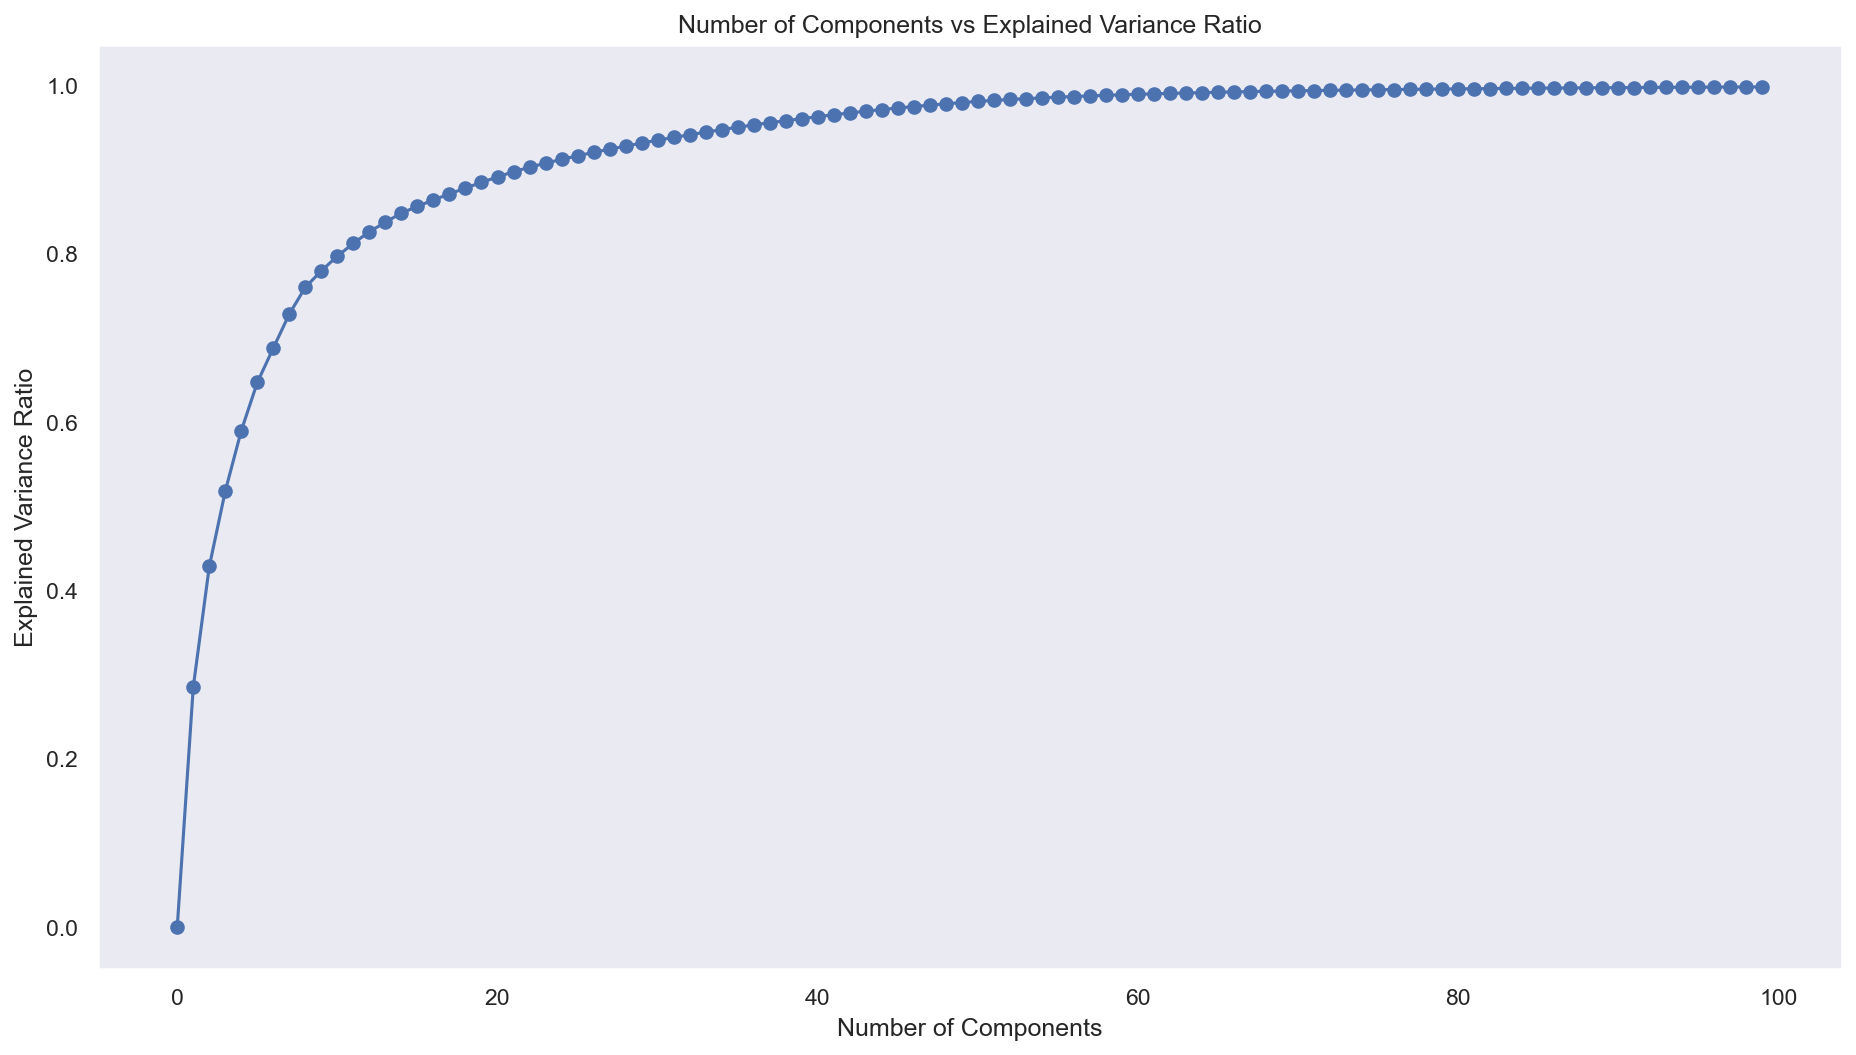

In [189]:
# Set the figure size for the plot
plt.figure(figsize=(15, 8), dpi=150)

# Plot the number of components against the explained variance ratio
plt.plot(nums, var_ratio, marker='o')

# Label the x-axis
plt.xlabel('Number of Components')

# Label the y-axis
plt.ylabel('Explained Variance Ratio')

# Set the title of the plot
plt.title('Number of Components vs Explained Variance Ratio')

# Add a grid to the plot for better readability
plt.grid()

# Display the plot
plt.show()


By analyzing where the curve begins to flatten, one can identify a suitable point to reduce dimensionality while still retaining most of the information in the dataset. For instance, over 95% of the variance can be explained with about 50 components, this may be a practical choice for feature reduction.

In [190]:
# Create a PCA object with 50 components and fit it to the dataset X, transforming the data accordingly.
pca = PCA(n_components=50)  # Initialize PCA to reduce data to 50 dimensions
pca_transformed = pca.fit_transform(X)  # Fit the PCA model and transform the dataset X


In [191]:
# Displaying the transformed data
pd.DataFrame(pca_transformed)

0         1         2         3         4         5         6   \
0    -22.090496  2.173146  7.179711 -2.515579  7.856419 -8.814572 -0.698083   
1      1.547839 -3.699029 -2.508768 -2.018815  0.199981 -0.985708 -3.183042   
2    -16.227998  1.729039  5.336769 -0.431486  0.821666  2.096955  1.334853   
3      1.151873 -2.298459 -3.197488  0.753446 -0.461684 -0.472861 -5.783696   
4      2.223308 -3.230623 -1.792591 -1.423737  0.037478  3.011080 -3.146900   
...         ...       ...       ...       ...       ...       ...       ...   
4419   2.530399 -1.824123 -3.800346  9.249783  1.503862 -1.387803  0.211404   
4420  -2.071023 -2.723690 -1.119701 -3.067936 -2.407100 -0.729847  0.107199   
4421   0.778645 -2.473667 -1.780828 -0.530928 -3.834943  0.911815 -3.064987   
4422  -0.552704 -2.245459 -2.667621  1.051174  0.048693 -2.678731 -6.028742   
4423   3.640429 -3.045789 -3.007347  5.776917  4.506570 -0.304386  3.945236   

            7         8         9   ...        40        41        42  \
0     0.971211 -2.282704 -1.900108  ...  0.213412  0.735449 -0.590482   
1     1.156343  1.454262  2.648011  ... -0.004030 -0.869696  2.110333   
2    -1.122108  7.070557  1.102878  ...  0.055515  0.118898  1.403189   
3     1.316551  0.738745 -3.272751  ... -0.274422 -0.270704 -0.089104   
4     1.763582 -3.627544  5.304157  ...  0.099386  0.316609 -0.178170   
...        ...       ...       ...  ...       ...       ...       ...   
4419  0.721262  0.609162 -0.954301  ...  0.137785 -0.156004 -1.011257   
4420 -0.725080  0.757761 -1.082370  ... -0.524080 -0.742971  1.052922   
4421  1.173134 -0.555545  3.033653  ... -0.190667  0.266200 -0.212570   
4422  1.700691  1.493228  0.615663  ... -0.811792 -0.117191  0.120059   
4423 -0.589130 -0.335870  2.659491  ... -0.310936  0.163603  0.394944   

            43        44        45        46        47        48        49  
0    -0.339283 -0.228013  0.578896  0.580420 -0.031739 -0.231319 -0.366347  
1    -0.705787 -0.021819  0.436295  0.779233 -0.306087 -0.290277 -0.424584  
2    -1.514406 -0.043414  0.653311  0.254474  0.500867 -0.226795 -0.536876  
3     0.132637  0.300069  0.472546  0.075671 -0.085875 -0.161467 -0.575381  
4     0.068643 -0.281791  0.117177  0.054486 -0.462449  0.070194  0.051517  
...        ...       ...       ...       ...       ...       ...       ...  
4419 -0.566383  0.088637  0.232771  0.111747  0.370002  0.352574 -0.052146  
4420  1.056158 -1.029585  0.479546 -0.150099  0.076513  1.005637  0.023131  
4421  0.287366 -1.340030  0.594582  0.087795  1.065281  1.224504  0.932771  
4422 -0.105661  0.607560  0.257931  0.212295  0.290509  0.050611 -0.808242  
4423 -0.338520 -0.375768 -0.350893 -0.459190  0.098386 -0.674799 -0.057983  

[4424 rows x 50 columns]

In [192]:
# Create a scatter plot using Plotly Express to visualize the first two principal components from the PCA transformation.
fig = px.scatter(x=pca_transformed[:, 0], y=pca_transformed[:, 1], color=y)  # Scatter plot of first two PCA components, colored by target variable y
fig.update_layout(
    title="PCA Visualization of Student Dropout Dataset",  
    xaxis_title="First Principal Component", 
    yaxis_title="Second Principal Component", 
)
fig.show() 


## T-SNE

In [193]:
# Perform t-Distributed Stochastic Neighbor Embedding (t-SNE) for dimensionality reduction to visualize high-dimensional data in 2D.
tsne = TSNE(n_components=2, random_state=105) 
X_tsne = tsne.fit_transform(X)  # Fit the t-SNE model to the data X and transform it to 2D space


In [194]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y)
fig.update_layout(
    title="t-SNE visualization of Student Dropout Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

In [195]:
# Saving the feature engineering pipeline for future use
with open('feature_engineering.pkl', 'wb') as f:
    pickle.dump(pipeline_eng, f)